# Fixation analysis (compressed fixations)
# Reanalysis eLife - No last fixation 
-------------------

## Load fixation and trial information 

In [72]:
data_fix_1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/fixation_FFA_Collapsed_AllConditions_31.csv') 
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/DataFoodFramingNotebook_31.csv') 

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]
Number of participants: 31


## Add microsaccades info 

In [73]:
data_exp1_microSc = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/Microfixations_AllConditions_31.csv') 
data_exp1 = data_exp1.reset_index()

data_exp1['LmSacc'] = data_exp1_microSc['microfix1_drop']
data_exp1['RmSacc'] = data_exp1_microSc['microfix2_drop']
data_exp1['DmSacc'] = data_exp1_microSc['microfix2_drop'] - data_exp1_microSc['microfix1_drop']
data_exp1['AbsDmSacc'] = abs(data_exp1_microSc['microfix2_drop'] - data_exp1_microSc['microfix1_drop'])
data_exp1['TotmSacc'] = data_exp1_microSc['microfix2_drop'] + data_exp1_microSc['microfix1_drop']


data_exp1['LmSaccTime'] = data_exp1_microSc['microfix_1_drop_timeavg']
data_exp1['RmSaccTime'] = data_exp1_microSc['microfix_2_drop_timeavg']
data_exp1['DmSaccTime'] = data_exp1_microSc['microfix_2_drop_timeavg'] - data_exp1_microSc['microfix_1_drop_timeavg']
data_exp1['AbsDmSaccTime'] = abs(data_exp1_microSc['microfix_2_drop_timeavg'] - data_exp1_microSc['microfix_1_drop_timeavg'])



data_exp1["zLmSacc"] = z_score1(data_exp1,'Part',"LmSacc")
data_exp1["zRmSacc"] = z_score1(data_exp1,'Part',"RmSacc")
data_exp1["zDmSacc"] = z_score1(data_exp1,'Part',"DmSacc")
data_exp1["zAbsDmSacc"] = z_score1(data_exp1,'Part',"AbsDmSacc")
data_exp1["zTotmSacc"] = z_score1(data_exp1,'Part',"TotmSacc")

data_exp1["zLmSaccTime"] = z_score1(data_exp1,'Part',"LmSaccTime")
data_exp1["zRmSaccTime"] = z_score1(data_exp1,'Part',"RmSaccTime")
data_exp1["zDmSaccTime"] = z_score1(data_exp1,'Part',"DmSaccTime")
data_exp1["zAbsDmSaccTime"] = z_score1(data_exp1,'Part',"AbsDmSaccTime")


In [74]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})


In [75]:
## Add column with the item with higher value for each trial

data_exp1["zHighVal"] = data_exp1[["zRVal", "zLVal"]].max(axis=1)
data_exp1["zLowVal"] = data_exp1[["zRVal", "zLVal"]].min(axis=1)

data_exp1['HighValPos'] = np.where((data_exp1['zHighVal'] == data_exp1['zLVal']) , 1, 2)
data_exp1['LowValPos'] = np.where((data_exp1['zLowVal'] == data_exp1['zLVal']) , 1, 2)

## Add normalized microsaccades (nº of microsaccades / dwelling time)

data_exp1['NormLmSacc'] = data_exp1['LmSacc']/data_exp1['LDwellTime']
data_exp1['NormRmSacc'] = data_exp1['RmSacc']/data_exp1['RDwellTime']

data_exp1['NormDmSacc']  = data_exp1['NormRmSacc'] - data_exp1['NormLmSacc'] 
data_exp1['AbsNormDmSacc']  = abs(data_exp1['NormRmSacc'] - data_exp1['NormLmSacc']) 

data_exp1["zNormDmSacc"] = z_score1(data_exp1,'Part',"NormDmSacc")
data_exp1["zAbsNormDmSacc"] = z_score1(data_exp1,'Part',"AbsNormDmSacc")


In [76]:
par_list = data_fix_1["parcode"].unique()
parInfoList = data_exp1["Part"].unique()
print('Participants names')
print(par_list)
print(parInfoList)

Participants names
[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]
[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]


In [77]:
data_fix_1.head()

,parcode,trial,fix_item,fix_time,rt,block
0,1,0,0,601,3327,2.0
1,1,0,1,878,3327,2.0
2,1,0,2,694,3327,2.0
3,1,0,1,1154,3327,2.0
4,1,1,3,215,3424,2.0


## As in Krajbich, remove trials and collapse fixations

If the blank fixations were recorded between fixations on the same item, then those blank fixations were changed to that item. So, for example, a fixation pattern of ‘Left’, ‘Blank’, ‘Left’ would become ‘Left’, ‘Left’, ‘Left’. We look for the target sequence ‘Left’, ‘Blank’, ‘Left’ or ‘Right’, ‘Blank’, ‘Right’

Additionally, reject trials with initial fixations to no item (>40 ms)


In [78]:
# check for each participant and extract trial list

new_data_fix_1 = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]]  
    trial_list = data_fix1_part["trial"].unique()
    # check for each trial and extract fixations
    for j in trial_list:
            data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j]
            data_fix1_trial = data_fix1_trial.reset_index(drop=True)
            fix_list = data_fix1_trial.fix_item.values
            fixlen = len(fix_list)
            # is the sequence long enough to have at least 3 fixations??
            if fixlen > 2:
                    #breakl = 0
                    ii = 0
                    # check across fixations and remove the 0 or 3 fixations that are in between two fixations to the same item
                    while ii < fixlen:
                     #   if breakl >0:
                     #           breakl = breakl-1
                     #           continue
                        if ii<fixlen-2: # check we have not reached the end of the list
                            if fix_list[ii] == 1 and (fix_list[ii+1] == 0 or fix_list[ii+1] == 3) and fix_list[ii+2] == 1: # if we have the target sequence
                                # generate the row in data_fix containing the compressed information for the 3 fixations
                                parcode_og = data_fix1_trial.iloc[ii].parcode
                                trial_og = data_fix1_trial.iloc[ii].trial
                                fix_item_og = data_fix1_trial.iloc[ii].fix_item # we assign the item in the first location (fix_list[ii])
                                fix_time_og = data_fix1_trial.iloc[ii:ii+3].fix_time.sum() # we add the fixation times for the 3 locations 
                                rt_og = data_fix1_trial.iloc[ii].rt
                                block_og = data_fix1_trial.iloc[ii].block
                                
                                new_data_fix_1.append([parcode_og,trial_og,fix_item_og,fix_time_og,rt_og,block_og])
                    #            breakl =2
                                # we jump the next trials in case we already identified them as part of the target sequence
                                ii = ii +2
#
                            elif fix_list[ii] == 2 and (fix_list[ii+1] == 0 or fix_list[ii+1] == 3) and fix_list[ii+2] == 2: # if we have the other target sequence
                                # generate the row in data_fix containing the compressed information for the 3 fixations
                                parcode_og = data_fix1_trial.iloc[ii].parcode
                                trial_og = data_fix1_trial.iloc[ii].trial
                                fix_item_og = data_fix1_trial.iloc[ii].fix_item # we assign the item in the first location (fix_list[ii])
                                fix_time_og = data_fix1_trial.iloc[ii:ii+3].fix_time.sum() # we add the fixation times for the 3 locations 
                                rt_og = data_fix1_trial.iloc[ii].rt
                                block_og = data_fix1_trial.iloc[ii].block
                                
                                new_data_fix_1.append([parcode_og,trial_og,fix_item_og,fix_time_og,rt_og,block_og])
                      #          breakl =2
                                ii = ii +2
                            # if target pattern is not found we copy the identical line
                            else:
                                new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

#
#
                        else : # we copy the entire row as it was for the last fixations in the sequence (i>=fixlen-2)
                            new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

                        ii = ii + 1
            else:
                    for ii in range(fixlen):
                            new_data_fix_1.append(data_fix1_trial.iloc[ii].values)

                    

new_data_fix_1 = pd.DataFrame(new_data_fix_1,columns=['parcode','trial','fix_item','fix_time','rt','block'])
        


In [79]:
new_data_fix_1.head()

,parcode,trial,fix_item,fix_time,rt,block
0,1.0,0.0,0.0,601.0,3327.0,2.0
1,1.0,0.0,1.0,878.0,3327.0,2.0
2,1.0,0.0,2.0,694.0,3327.0,2.0
3,1.0,0.0,1.0,1154.0,3327.0,2.0
4,1.0,1.0,3.0,215.0,3424.0,2.0


### Replace the old fixation dataframe 

In [80]:
data_fix_1 = new_data_fix_1.copy()

## Extract fixations info

In [81]:
# Areas defined in DataViewer Reports are 
## 1 : Left
## 2 : Right
## 3 : Symbol for block
## 4 : Center space
## Any other area will be indicated as empty


fixations_info = []
firstFix0_times = []
fixations_details = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    for j in trial_list:
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_fix_list = data_fix1_trial['fix_item'].values
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        trial_fix_count = np.bincount(trial_fix_list.astype(np.int)) # the count is in order [0,1,2,3]
        mostPopularFix =  np.argmax(trial_fix_count)
        numMostPopularFix = trial_fix_count[mostPopularFix]  

        if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:# if we start with central fixation, we check the next fixation as initial
            first_fix_id = trial_fix_list[1]
            first_fix_time = data_fix1_trial['fix_time'].values[1]
        else:
            first_fix_id = trial_fix_list[0]
            first_fix_time =data_fix1_trial['fix_time'].values[0]
            
        if trial_fix_list[1] == 0: #if first fixation is 0 flag it to delete later
            firstFix_0_flag = 1
            firstFix0_times.append(str(first_fix_id) + 'time' + str(first_fix_time) )
        else:
            firstFix_0_flag = 0
            
            
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        last_fix_time = data_fix1_trial['fix_time'].values[len(data_fix1_trial)-1]
        
        total_time = data_fix1_trial['fix_time'].sum() 
        
        
        # second fixation info
        if len(data_fix1_trial)>2:
            if data_fix1_trial.iloc[0].fix_item == 3 or data_fix1_trial.iloc[0].fix_item == 0: # if we start with a fixation at the middle or outside (the latter shouldn't be but we add it just in case)
                if  data_fix1_trial.iloc[2].fix_item == 1 or data_fix1_trial.iloc[2].fix_item == 2:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[2].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[3].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[3].fix_item
            else: # if we start with a fixation not to the middle
                if  data_fix1_trial.iloc[1].fix_item != 3 or data_fix1_trial.iloc[1].fix_item != 0:
                    second_fix_time = data_fix1_trial.iloc[1].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[1].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[2].fix_item

        else:
            second_fix_time = np.nan
            second_fix_id = np.nan
        
        
        # Check for non-final fixations info
        
        if len(data_fix1_trial)>2:
                    non_final_fixations = data_fix1_trial.iloc[0:-1] # remove only last fixation of the series
                    # keep only fixations to the items
                    #non_final_fixations = non_final_fixations.loc[(non_final_fixations.fix_item == 1) | (non_final_fixations.fix_item == 2)]
                    # extra overall non-final fix time mean
                    non_final_fix_time =non_final_fixations.fix_time.sum() 
                    non_final_fix_avgtime =non_final_fixations.fix_time.mean() 
                    non_final_fix_ltime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 1].fix_time.sum()
                    non_final_fix_avgltime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 1].fix_time.mean()                     
                    non_final_fix_rtime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 2].fix_time.sum()
                    non_final_fix_avgrtime = non_final_fixations.loc[ non_final_fixations["fix_item"] == 2].fix_time.mean()
                    non_final_fix_GSF = len(non_final_fixations)
                    
        else:
                    non_final_fix_time = np.nan
                    non_final_fix_ltime = np.nan
                    non_final_fix_rtime = np.nan
                    non_final_fix_avgltime = np.nan
                    non_final_fix_avgrtime = np.nan
                    non_final_fix_GSF = np.nan

        # Check fixations minus last 2 info
        
        if len(data_fix1_trial)>3:
                    non_final_2_fixations = data_fix1_trial.iloc[0:-2] # remove only last two fixation of the series
                    # keep only fixations to the items
                    #non_final_fixations = non_final_fixations.loc[(non_final_fixations.fix_item == 1) | (non_final_fixations.fix_item == 2)]
                    # extra overall non-final fix time mean
                    non_final_2_fix_time =non_final_2_fixations.fix_time.sum() 
                    non_final_2_fix_avgtime =non_final_2_fixations.fix_time.mean() 
                    non_final_2_fix_ltime = non_final_2_fixations.loc[ non_final_2_fixations["fix_item"] == 1].fix_time.sum()
                    non_final_2_fix_avgltime = non_final_2_fixations.loc[ non_final_2_fixations["fix_item"] == 1].fix_time.mean()                     
                    non_final_2_fix_rtime = non_final_2_fixations.loc[ non_final_2_fixations["fix_item"] == 2].fix_time.sum()
                    non_final_2_fix_avgrtime = non_final_2_fixations.loc[ non_final_2_fixations["fix_item"] == 2].fix_time.mean()
                    non_final_2_fix_GSF = len(non_final_2_fixations)
                    
        else:
                    non_final_2_fix_time = np.nan
                    non_final_2_fix_ltime = np.nan
                    non_final_2_fix_rtime = np.nan
                    non_final_2_fix_avgltime = np.nan
                    non_final_2_fix_avgrtime = np.nan
                    non_final_2_fix_GSF = np.nan
                    
     #   ## Generate DDT course within a trial
     #   rt_trial = data_fix1_trial.fix_time.sum()
     #   rt_trial = data_fix1_trial.fix_time.sum()
#
     #   for ii in arange (0, rt_trial, 25):
     #       
     #       data_fix1_trial
     #       non_final_fixations = non_final_fixations.loc[(non_final_fixations.fix_item == 1) | (non_final_fixations.fix_item == 2)]
     #       non_final_fix_DDT_timln[ii] = 
        
        
                    
        # Check identity of first/last fixation and determine the value and familiarity linked
        
        if first_fix_id == 1: 
            firstFixValue = float(data_info1_trial['LVal'].values)
            firstFixFam = float(data_info1_trial['LFam'].values)
        elif first_fix_id == 2: 
            firstFixValue = float(data_info1_trial['RVal'].values)
            firstFixFam = float(data_info1_trial['RFam'].values)
        else:
            firstFixValue = np.nan
            firstFixFam = np.nan

        if last_fix_id == 1: 
            lastFixValue = float(data_info1_trial['LVal'].values)
            lastFixFam = float(data_info1_trial['LFam'].values)
        elif last_fix_id == 2: 
            lastFixValue = float(data_info1_trial['RVal'].values)
            lastFixFam = float(data_info1_trial['RFam'].values)    
        else:
            lastFixValue = np.nan
            lastFixFam = np.nan
        
        #Characterize medium fixations
        # Is there any medium fixations?
        fixatNum = len(data_fix1_trial)
        
        if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
            middleFixNum = len(data_fix1_trial) - 3
        else:
            middleFixNum = len(data_fix1_trial) - 2
            
            
        # Generate medium    
        if (fixatNum > 3 and (trial_fix_list[0] == 3 or trial_fix_list[0] == 0)) or (fixatNum > 2 and (trial_fix_list[0] != 3 and trial_fix_list[0] != 0)): 
            trialFixListMedium = np.delete(trial_fix_list, -1) # delete last element of the fixation series
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
                trialFixListMedium = np.delete(trialFixListMedium, [0,1]) # delete first two element of the first fixation goes to center or outside
            else:
                trialFixListMedium = np.delete(trialFixListMedium, 0) # delete first element of the fixation series starts with an item
            trialFixListMediumBin = np.bincount(trialFixListMedium.astype(np.int))
            mostPopularFixMed = np.argmax(trialFixListMediumBin)
            numMostPopularFixMed = trialFixListMediumBin[mostPopularFixMed]  
            
        else:
            trialFixListMedium = np.nan
            mostPopularFixMed = np.nan
            numMostPopularFixMed = np.nan
        
        # we don't consider as middle fixations the cases where we have only two fixations (i.e. begining and end)
        if (fixatNum > 3 and (trial_fix_list[0] == 3 or trial_fix_list[0] == 0)) or (fixatNum > 2 and (trial_fix_list[0] != 3 or trial_fix_list[0] != 0)):
            middleFixTotTime =  (data_fix1_trial['fix_time'].sum() - last_fix_time - first_fix_time)       
            #middleFixTimeAvg = middleFixTotTime / middleFixNum
            #if middleFixTimeAvg < 0:
            #    print (str(data_fix1_trial['fix_time'].sum()) + 'last'+ str(last_fix_time) + 'first' + str(first_fix_time))
            #    print(data_fix1_trial['fix_time'])
           # get medium fixations times
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:
                data_fix1_trial_aux = data_fix1_trial.iloc[2:len(data_fix1_trial)-1] # drop first and last fixations (since it starts with center fixation we drop the second too) 
            else:
                data_fix1_trial_aux = data_fix1_trial.iloc[1:len(data_fix1_trial)-1] # drop first and last fixations (since it starts with center fixation we drop the second too) 
            
            middleFixTimeAvg =  data_fix1_trial_aux.fix_time.mean()
            middlefix_ltime = np.sum(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 1].fix_time.values)
            middlefix_rtime = np.sum(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 2].fix_time.values)
            middlefix_avgltime = np.nanmean(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 1].fix_time.values)
            middlefix_avgrtime = np.nanmean(data_fix1_trial_aux.loc[ data_fix1_trial_aux["fix_item"] == 2].fix_time.values)

            middlefix_ddt = middlefix_rtime - middlefix_ltime
            
            # generate dataframe only with medium fixations
            
            dataFixMedium = data_fix1_trial_aux.copy()
            for jj in range(len(dataFixMedium)):
                trial_mid = dataFixMedium.iloc[jj].trial
                part_mid = dataFixMedium.iloc[jj].parcode
                itemFix_mid = dataFixMedium.iloc[jj].fix_item
                fixTime_mid = dataFixMedium.iloc[jj].fix_time
                block_mid = dataFixMedium.iloc[jj].block
                if itemFix_mid == 1: # if item is left
                    valueFix_mid = float(data_info1_trial['LVal'].values)
                    # fixated - fixated item
                    DValFix_mid = float(data_info1_trial['LVal'].values) - \
                                  float(data_info1_trial['RVal'].values)
                elif itemFix_mid == 2: # if item is right
                    valueFix_mid = float(data_info1_trial['RVal'].values)
                    # fixated - fixated item
                    DValFix_mid = float(data_info1_trial['RVal'].values) -  \
                                  float(data_info1_trial['LVal'].values)
                else: # if no item is being fixated
                    valueFix_mid = np.nan
                    DValFix_mid = np.nan
                fixations_details.append([part_mid,trial_mid,itemFix_mid,fixTime_mid,
                                         block_mid,valueFix_mid,DValFix_mid])
     
        else:
            middleFixTotTime = np.nan
            middleFixTimeAvg = np.nan
            middlefix_ltime = np.nan
            middlefix_rtime = np.nan
            middlefix_avgltime = np.nan
            middlefix_avgrtime = np.nan
            middlefix_ddt = np.nan

        
        fixations_info.append([i,j,first_fix_id , first_fix_time, last_fix_id,last_fix_time, 
                               firstFixValue, firstFixFam,lastFixValue, lastFixFam,
                               fixatNum,middleFixNum,mostPopularFix, numMostPopularFix, mostPopularFixMed, numMostPopularFixMed,
                               middleFixTotTime,middleFixTimeAvg,total_time,middlefix_ltime,middlefix_rtime,middlefix_ddt,
                              middlefix_avgltime,middlefix_avgrtime,
                              second_fix_time,second_fix_id,firstFix_0_flag,
                              non_final_fix_time,non_final_fix_avgtime,non_final_fix_ltime,non_final_fix_rtime,non_final_fix_avgltime,non_final_fix_avgrtime,non_final_fix_GSF,
                              non_final_2_fix_time,non_final_2_fix_avgtime,non_final_2_fix_ltime,non_final_2_fix_rtime,non_final_2_fix_avgltime,non_final_2_fix_avgrtime,non_final_2_fix_GSF]) 



/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:191: RuntimeWarning: Mean of empty slice
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:192: RuntimeWarning: Mean of empty slice


In [82]:
fixation_file = pd.DataFrame(fixations_info,columns=['Part','Trial', '1stFixation', '1stFixationTime', 'LastFixation','LastFixationTime', 
                                                     'firstFixValue', 'firstFixFam','lastFixValue', 'lastFixFam',
                               'fixatNum','middleFixNum','mostPopularFix', 'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
                               'middleFixTime','middleFixTimeAvg','TotalTime','midfix_Ltime','midfix_Rtime','midfix_ddt',
                                                    'midfix_avgLtime','midfix_avgRtime','second_fix_time','second_fix_id','firstFix_0_flag',
                                'nff_time','nff_avgTime','nff_ltime','nff_rtime','nff_avgltime','nff_avgrtime',"nff_GSF",
                                                    'nff2_time','nff2_avgTime','nff2_ltime','nff2_rtime','nff2_avgltime','nff2_avgrtime',"nff2_GSF"])


fixations_details_df = pd.DataFrame(fixations_details,columns=['Part','Trial','ItemFix','FixTime','Block','ValFix','DValFix'])

fixation_file = fixation_file.drop(["Part", "Trial"], axis=1)


In [83]:
fixation_file.head()

,1stFixation,1stFixationTime,LastFixation,LastFixationTime,firstFixValue,firstFixFam,lastFixValue,lastFixFam,fixatNum,middleFixNum,...,nff_avgltime,nff_avgrtime,nff_GSF,nff2_time,nff2_avgTime,nff2_ltime,nff2_rtime,nff2_avgltime,nff2_avgrtime,nff2_GSF
0,1.0,878.0,1.0,1154.0,0.95,1.08,0.95,1.08,4,1,...,878.0,694.0,3.0,1479.0,739.500000,878.0,0.0,878.0,NaN,2.0
1,1.0,686.0,2.0,403.0,2.30,4.83,1.70,3.58,5,2,...,659.0,1488.0,4.0,2389.0,796.333333,686.0,1488.0,686.0,1488.0,3.0
2,1.0,1108.0,2.0,2244.0,1.70,5.00,1.25,2.83,3,0,...,1108.0,NaN,2.0,NaN,796.333333,NaN,NaN,NaN,NaN,NaN
3,1.0,626.0,1.0,3183.0,1.55,5.00,1.55,5.00,6,3,...,787.0,1555.0,5.0,4179.0,1044.750000,1574.0,2328.0,787.0,2328.0,4.0
4,1.0,1508.0,1.0,807.0,2.00,4.33,2.00,4.33,6,3,...,1787.0,1089.0,5.0,5156.0,1289.000000,3574.0,1582.0,1787.0,1582.0,4.0


In [84]:
data_exp11 = pd.DataFrame()
data_exp1 = data_exp1.reset_index(drop= True)
fixation_file =fixation_file.reset_index(drop= True)
frames_list = [data_exp1,fixation_file]
data_exp11 = pd.concat(frames_list, axis = 1)
#fixation_file.to_csv("Output/DataAllFixINcluTEST31.csv",index = False)
# z-score the middle fixations relevant variables

## Construct array with the fixation sequence

In [85]:
fixations_timeline = []

# select each participant
for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    
    #select each trial
    for j in trial_list:
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_rt = data_info1_trial.RT.values[0]
        trial_block = data_info1_trial.BlockCond.values[0]
        
        fix_list = range(len(data_fix1_trial))
        fix_id = data_fix1_trial.fix_item.values
        fix_id_time = data_fix1_trial.fix_time.values
        fixat_timeline = []
        
        #extract the timeline for each trial
        for k in fix_list:
                fix_time_1 = fix_id_time[k]
                fix_id_1 = fix_id[k]
                period_count = [fix_id_1]*int(np.round(fix_time_1/10))            
                fixat_timeline = np.concatenate((fixat_timeline,period_count))
        
        # remove trials in which there is no fixation to the items
        fixat_timeline[(fixat_timeline!=1) & (fixat_timeline!=2)] = np.nan 
        
        rGazeTime = 0
        lGazeTime = 0
        ddt_timeline = []
        for l in range(0,len(fixat_timeline)):
            rGazeTime = rGazeTime + 10*(fixat_timeline[l] == 2)
            lGazeTime = lGazeTime + 10*(fixat_timeline[l] == 1)
            ddt_timeline.append(rGazeTime - lGazeTime)
        
        fixations_timeline.append([par_list[i],j,trial_rt,trial_block,fixat_timeline,ddt_timeline])

fixation_timeline = pd.DataFrame(fixations_timeline,columns=['parcode','trial', 'RT','block','fixTimeln','ddtTimeln'])       

In [86]:
ddt_timeln_matrix = fixation_timeline['ddtTimeln'].to_numpy()

## Add extra variables

In [87]:
data_exp11['ddt_nonLast'] =  data_exp11['nff_rtime'] - data_exp11['nff_ltime']
data_exp11["zDDT_nonLast"] = z_score1(data_exp11,'Part',"ddt_nonLast")
data_exp11["zNFF_time"] = z_score1(data_exp11,'Part',"nff_time")
data_exp11["zNFF_GSF"] = z_score1(data_exp11,'Part',"nff_GSF")

# non-last-2 fixations
data_exp11['ddt_nonLast2'] =  data_exp11['nff2_rtime'] - data_exp11['nff2_ltime']
data_exp11["zDDT_nonLast2"] = z_score1(data_exp11,'Part',"ddt_nonLast2")
data_exp11["zNFF2_time"] = z_score1(data_exp11,'Part',"nff2_time")
data_exp11["zNFF2_GSF"] = z_score1(data_exp11,'Part',"nff2_GSF")


data_exp11["zLastFixationTime"] = z_score1(data_exp11,'Part',"LastFixationTime")

# generate DDT measures for First, Middle and Last Fixations
data_exp11["DDT_firstFix"] = (data_exp11['1stFixation']==1)*(-data_exp11['1stFixationTime']) + (data_exp11['1stFixation']==2)*(data_exp11['1stFixationTime'])
data_exp11["DDT_lastFix"] = (data_exp11['LastFixation']==1)*(-data_exp11['LastFixationTime']) + (data_exp11['LastFixation']==2)*(data_exp11['LastFixationTime'])
data_exp11["DDT_midFix"] = data_exp11['midfix_Rtime'] - data_exp11['midfix_Ltime']
data_exp11["zDDT_firstFix"] = z_score1(data_exp11,'Part',"DDT_firstFix")
data_exp11["zDDT_lastFix"] = z_score1(data_exp11,'Part',"DDT_lastFix")
data_exp11["zDDT_midFix"] = z_score1(data_exp11,'Part',"DDT_midFix")
data_exp11["zDDT_nonLast2Fix"] = z_score1(data_exp11,'Part',"ddt_nonLast2")




In [88]:
%R -i data_exp11 #-i fixation_timeline_R

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [89]:
%%R
library(lme4)
library(car)
library(optimx)
#library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

In [90]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp11[ which(data_exp11$BlockCond=='1'), ]
data_exp1_DisLike <- data_exp11[ which(data_exp11$BlockCond=='2'), ]

# Regressions for non-final fixations
-----------

# Choice regressions

## Full trial time choice regression (presented on the paper)

[1] "Like BIC:"
[1] 3680.254
[1] "DisLike BIC:"
[1] 3976.435


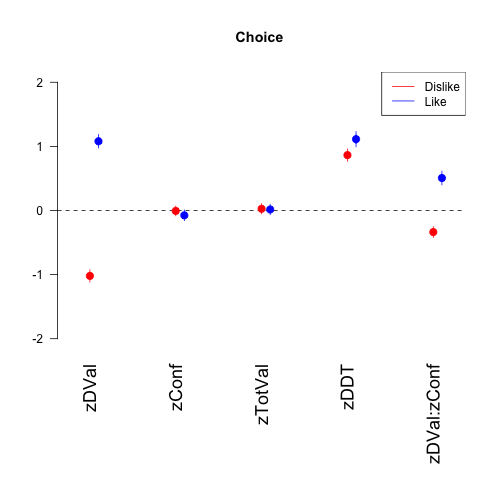

In [91]:
%%R

title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Choice regression minus last fixation period

[1] "Like BIC:"
[1] 3396.754
[1] "DisLike BIC:"
[1] 3776.952


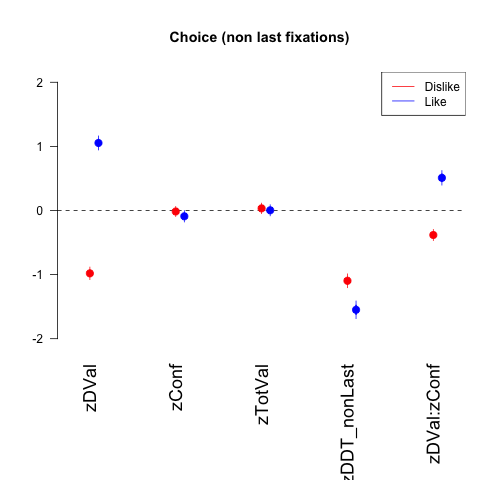

In [92]:
%%R

title_plot = "Choice (non last fixations) "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_nonLast  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_nonLast , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

# Choice regression minus last 2 fixations

[1] "Like BIC:"
[1] 2032.606
[1] "DisLike BIC:"
[1] 2575.39


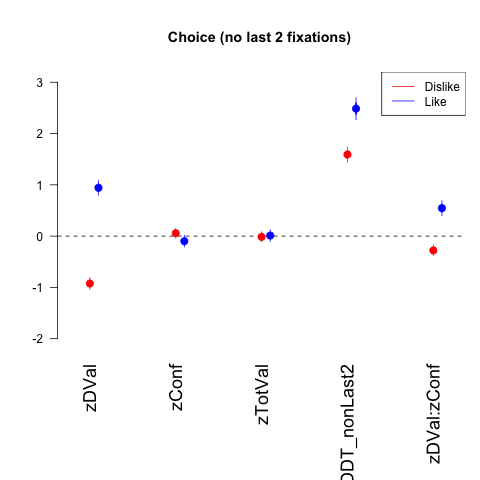

In [93]:
%%R

title_plot = "Choice (no last 2 fixations) "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_nonLast2  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_nonLast2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Choice regression - FIRST FIXATIONS ONLY

[1] "Like BIC:"
[1] 4188.086
[1] "DisLike BIC:"
[1] 4406.513


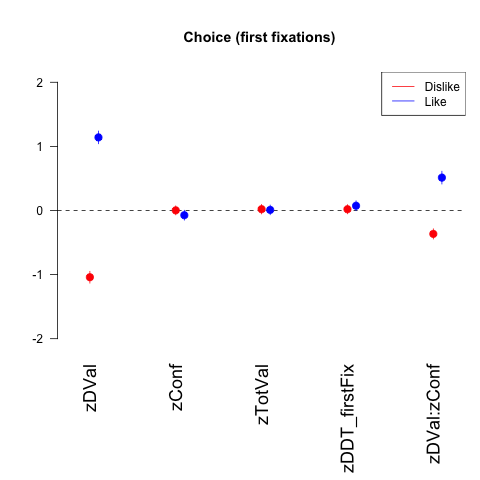

In [94]:
%%R

title_plot = "Choice (first fixations) "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_firstFix  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_firstFix , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Choice regression - MIDDLE FIXATIONS ONLY

[1] "Like BIC:"
[1] 3401.756
[1] "DisLike BIC:"
[1] 3789.715


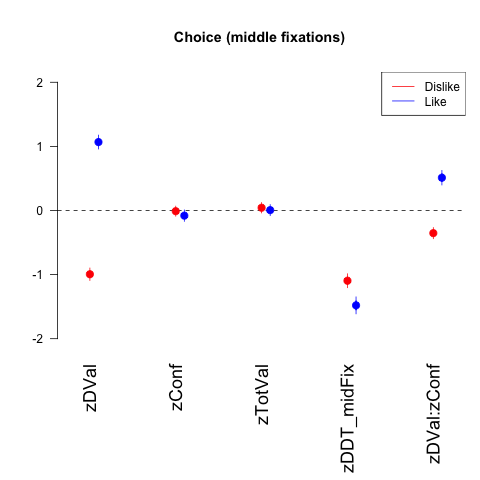

In [95]:
%%R

title_plot = "Choice (middle fixations) "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_midFix  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_midFix , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Choice regression - LAST FIXATIONS ONLY

[1] "Like BIC:"
[1] 1703.711
[1] "DisLike BIC:"
[1] 2160.519


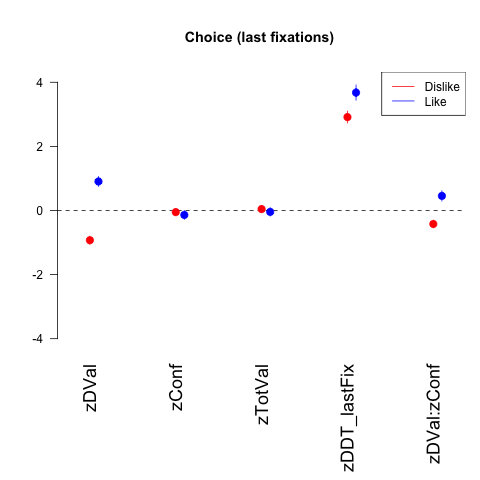

In [96]:
%%R

title_plot = "Choice (last fixations) "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_lastFix  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_lastFix , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-4, 4) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

# Confidence regressions

## Full trial time confidence regression (presented on the paper)

[1] "Like BIC:"
[1] 9747.907
[1] "DisLike BIC:"
[1] 10198.89


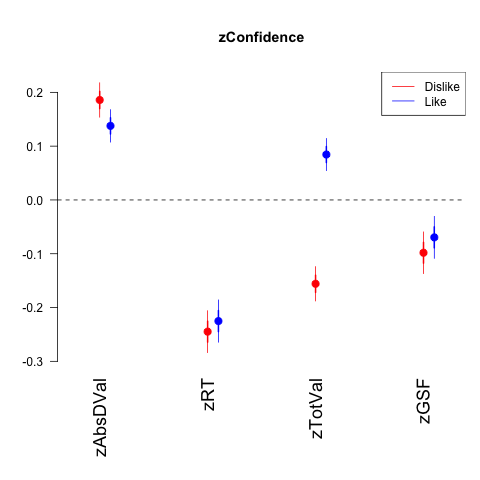

In [97]:
%%R
# Figure replicating Folke 2016. 
title_plot = (" zConfidence ")

ModelConfidenceL_1 <- glm(zConf ~ zAbsDVal + zRT  + zTotVal + zGSF , data=data_exp1_Like)
ModelConfidenceD_1 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zGSF , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_1)
BIC2 = BIC(ModelConfidenceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

#summary(logitMod_FF2017)
#summary(logitModLike_FF2017)
#summary(logitModUnlike_FF2017)

coefplot(ModelConfidenceD_1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Confidence regression minus last fixation period

[1] "Like BIC:"
[1] 9706.079
[1] "DisLike BIC:"
[1] 10119.4


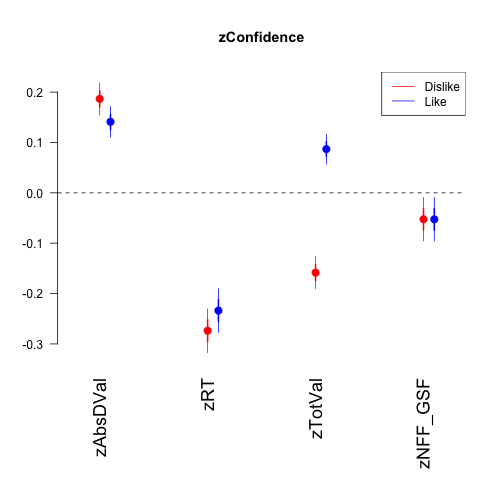

In [98]:
%%R
# Figure replicating Folke 2016. 
title_plot = (" zConfidence ")

ModelConfidenceL_1 <- glm(zConf ~ zAbsDVal + zRT  + zTotVal + zNFF_GSF , data=data_exp1_Like)
ModelConfidenceD_1 <- glm(zConf ~ zAbsDVal + zRT + zTotVal + zNFF_GSF , data=data_exp1_DisLike)

BIC1 = BIC(ModelConfidenceL_1)
BIC2 = BIC(ModelConfidenceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

#summary(logitMod_FF2017)
#summary(logitModLike_FF2017)
#summary(logitModUnlike_FF2017)

coefplot(ModelConfidenceD_1,intercept=FALSE, vertical = FALSE, col.pts="red", cex.var=1.5, cex.pts=2, offset = 0.05, mar = c(8,4,5,1) ,main=title_plot)
coefplot(ModelConfidenceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1),main="RegEstim")
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

## Include fixation timeline

In [99]:
data_exp11["ddtTimeln"] = fixation_timeline['ddtTimeln']
data_exp11["fixTimeln"] = fixation_timeline['fixTimeln']

## non rpy2 regression plots

In [100]:
data_exp_1 =  data_exp11.loc[data_exp11.BlockCond == 1] # like frame
data_exp_2 =  data_exp11.loc[data_exp11.BlockCond == 2] # dislike frame

data_exp_1 = data_exp_1.reset_index(drop=True)
data_exp_2 = data_exp_2.reset_index(drop=True)

Optimization terminated successfully.
         Current function value: 0.451138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503874
         Iterations 6


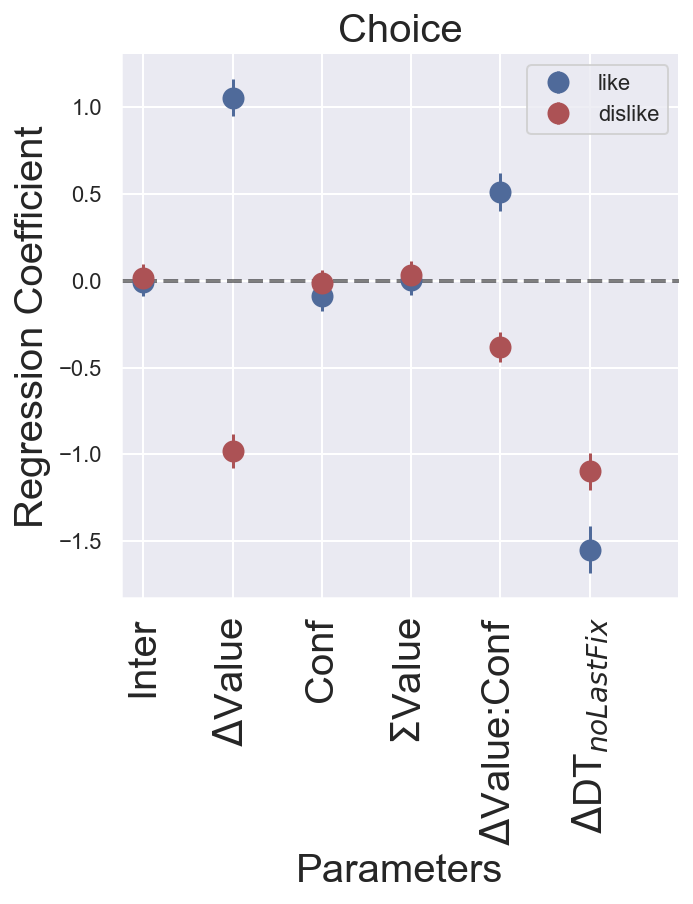

In [101]:
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']

regFormula = "Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_nonLast "
labFrame = ['like','dislike']

ols_reg_overall = logit(formula = regFormula, data=data_exp_1).fit()
ols_reg_overall2 = logit(formula = regFormula, data=data_exp_2).fit()

#print(ols_sims.summary())
regParamSov = ols_reg_overall.params.values
lowLimSov = ols_reg_overall.conf_int(alpha=0.05, cols=None)[0].values
highLimSov = ols_reg_overall.conf_int(alpha=0.05, cols=None)[1].values

regParamSov2 = ols_reg_overall2.params.values
lowLimSov2 = ols_reg_overall2.conf_int(alpha=0.05, cols=None)[0].values
highLimSov2 = ols_reg_overall2.conf_int(alpha=0.05, cols=None)[1].values


plt.errorbar(range(len(regParamSov)),regParamSov, yerr= (lowLimSov - highLimSov)/2 , color=colorP[0],marker='o', markersize=10 , label = labFrame[0],ls = '');
plt.errorbar(range(len(regParamSov2)),regParamSov2, yerr= (lowLimSov2 - highLimSov2)/2 , color=colorP[1],marker='o', markersize=10 , label = labFrame[1],ls = '');

plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

plt.xlabel("Parameters",size=20)
plt.ylabel("Regression Coefficient",size=20)
plt.title('Choice',size=20)
plt.xticks([0,1,2,3,4,5,6],['Inter','$\Delta$Value','Conf','$\Sigma$Value','$\Delta$Value:Conf','$\Delta$DT$_{noLastFix}$'], rotation='vertical',size=20)
plt.legend()
sns.set_style("white")
sns.despine()


# Instant fix side correlation with preference ratings (Kovach et al.,  2014,  version)

## 1.Instantaneous DT effect on time from the begining of the trial (PAPER VERSION)

In [62]:

def instantCorrFixPref (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_fix = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        fix_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if i < len(data_exp_1.fixTimeln[j]):
                fix_timept.append(data_exp_1.fixTimeln[j][i])
            else:
                fix_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['fix_instant'] = fix_timept
        data_exp_ref['fix_instant'] = data_exp_ref['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  
        
        #data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
        #regFormula = "fix_instant ~ zDVal"
        #ols_instant = logit(formula = regFormula, data=data_exp_ref, missing='drop').fit(disp = 0)
        #lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
        #highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # extract instant DDT parameter 
        #params_instant_ddt.append([ols_instant.params.values[-1],lowLim_inst[-1],highLim_inst[-1]])        
        
        # use correlation
        fix_ins = data_exp_ref['fix_instant'].values
        dvals = data_exp_ref['zDVal'].values
        nas = np.logical_or(np.isnan(fix_ins), np.isnan(dvals))
        [corr, p] = stats.pearsonr(fix_ins[~nas], dvals[~nas])
        n_corr =  len(data_exp_ref['fix_instant']) - np.sum(np.isnan(data_exp_ref['fix_instant']))
        corr_SE = np.sqrt((1-corr*corr)/(n_corr-2))  # equation for Standard Error 

        params_instant_fix.append([corr, corr_SE, p ])   
        
        
    params_instant_fix = pd.DataFrame(params_instant_fix,columns=['param','paramSE','p'])

    return params_instant_fix

In [63]:
instantEffectCorr_like = instantCorrFixPref (data_exp_1, time_picked = 2000)
instantEffectCorr_dislike = instantCorrFixPref (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


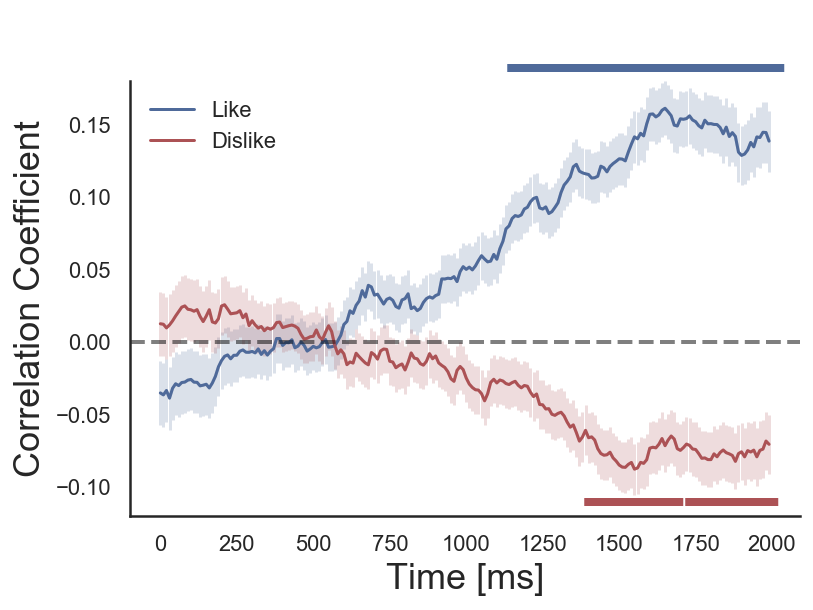

In [70]:

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectCorr_like))) * 10

plt.errorbar(xSecs,instantEffectCorr_like.param, yerr= instantEffectCorr_like.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike.param, yerr= instantEffectCorr_dislike.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1])

plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

m = len(instantEffectCorr_like.p) # number of hypothesis tested (for multiple comparison bonferroni correction)
for ii in range(len(instantEffectCorr_like.p)):
    if instantEffectCorr_like.p[ii]<0.05/m:
        plt.text(xSecs[ii], np.max(instantEffectCorr_like.param)+0.025, ".",  color=colorP[0], size=40)
    if instantEffectCorr_dislike.p[ii]<0.05/m:
        plt.text(xSecs[ii],np.min(instantEffectCorr_dislike.param)-0.025 , ".",  color=colorP[1], size=40)

plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.ylim(-0.12, 0.18)
#plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False)
sns.set_style("white")
sns.despine()

## 1.5 Same than the previous one but we check significance using permutation test. 

In [189]:
def instantCorrFixPref_Perm (data_exp_1, time_picked = 2000, nperm = 200):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_fix = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        fix_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if i < len(data_exp_1.fixTimeln[j]):
                fix_timept.append(data_exp_1.fixTimeln[j][i])
            else:
                fix_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['fix_instant'] = fix_timept
        data_exp_ref['fix_instant'] = data_exp_ref['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  
        
        #data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
        #regFormula = "fix_instant ~ zDVal"
        #ols_instant = logit(formula = regFormula, data=data_exp_ref, missing='drop').fit(disp = 0)
        #lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
        #highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # extract instant DDT parameter 
        #params_instant_ddt.append([ols_instant.params.values[-1],lowLim_inst[-1],highLim_inst[-1]])        
        
        # use correlation
        fix_ins = data_exp_ref['fix_instant'].values
        dvals = data_exp_ref['zDVal'].values
        nas = np.logical_or(np.isnan(fix_ins), np.isnan(dvals))
        [corr, p] = stats.pearsonr(fix_ins[~nas], dvals[~nas])
        n_corr =  len(data_exp_ref['fix_instant']) - np.sum(np.isnan(data_exp_ref['fix_instant']))
        corr_SE = np.sqrt((1-corr*corr)/(n_corr-2))  # equation for Standard Error 

        
        # calculate permutation test
        
        corr_perm = []
        for i in range(0,nperm):
            fix_ins_per = fix_ins.copy() 
            dvals_per = dvals.copy()
            shuffle(fix_ins_per)
            shuffle(dvals_per)
            nas = np.logical_or(np.isnan(fix_ins_per), np.isnan(dvals_per))
            [corr_i, p_i] = stats.pearsonr(fix_ins_per[~nas], dvals_per[~nas])
            corr_perm.append(corr_i)
        
        p_value = len(np.where(np.abs(corr_perm) >= np.abs(corr))[0])/len(corr_perm) # p_value of the permutation test
        
        # end permutation test
        
        params_instant_fix.append([corr, corr_SE, p ,p_value])   
            
    params_instant_fix = pd.DataFrame(params_instant_fix,columns=['param','paramSE','p','p_value'])

    return params_instant_fix

In [172]:
instantEffectCorr_like = instantCorrFixPref_Perm (data_exp_1, time_picked = 2000)
instantEffectCorr_dislike = instantCorrFixPref_Perm (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


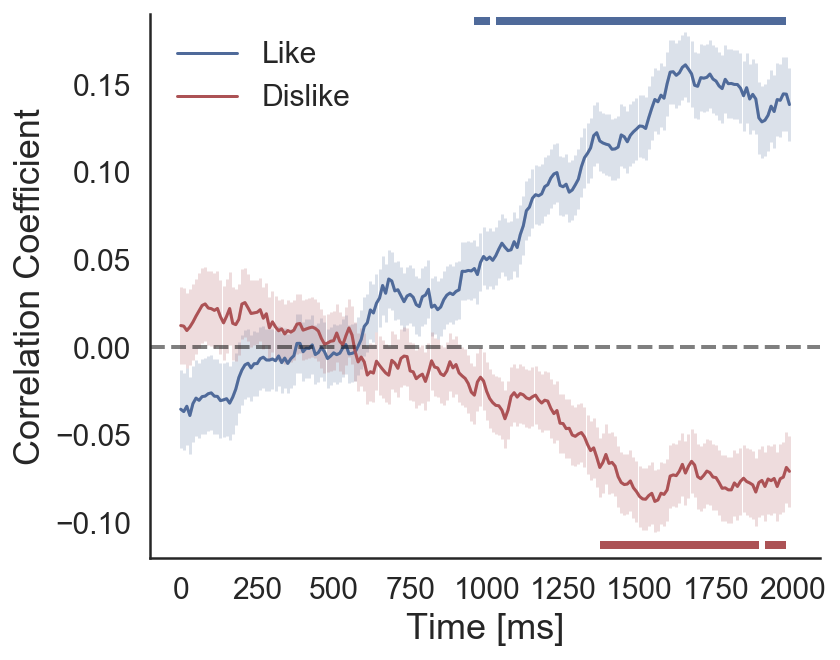

In [211]:

figsize(6, 5)

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectCorr_like))) * 10

plt.errorbar(xSecs,instantEffectCorr_like.param, yerr= instantEffectCorr_like.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike.param, yerr= instantEffectCorr_dislike.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1])

plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

#m = len(instantEffectCorr_like.p) # number of hypothesis tested (for multiple comparison bonferroni correction)

# FDR correction 0.01 (instead of bonferroni)
_,p_value_like_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_like.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)
_,p_value_dislike_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_dislike.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)

#for ii in range(len(instantEffectCorr_like.p_value)):
#    if instantEffectCorr_like.p_value[ii]<0.01/m:
#for ii in range(len(p_value_like_fdr)):
#    if p_value_like_fdr[ii]<0.01:
#        plt.text(xSecs[ii], np.max(instantEffectCorr_like.param)+0.025, ".",  color=colorP[0], size=40)
##    if instantEffectCorr_dislike.p_value[ii]<0.01/m:
#    if p_value_dislike_fdr[ii]<0.01:
#        plt.text(xSecs[ii],np.min(instantEffectCorr_dislike.param)-0.025 , ".",  color=colorP[1], size=40)

clusterSize = 6

for ii in range(len(p_value_like_fdr)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
    if np.sum(p_value_like_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
            plt.plot(xSecs[ii-clusterSize:ii], [np.max(instantEffectCorr_like.param)+0.025]*clusterSize, color=colorP[0],linewidth=4,solid_capstyle = 'butt')

for ii in range(len(p_value_dislike_fdr)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
    if np.sum(p_value_dislike_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
            plt.plot(xSecs[ii-clusterSize:ii], [np.min(instantEffectCorr_dislike.param)-0.025]*clusterSize, color=colorP[1],linewidth=4,solid_capstyle = 'butt')
        
plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

plt.ylim(-0.12, 0.19)
#plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False,fontsize=15)
sns.set_style("white")
sns.despine()

## 1.75 Same than the previous one but we check significance using permutation test, group difference. 

In [312]:
def instantCorrFixPref_PermGroupDif (data_exp_1,data_exp_2, time_picked = 2000, nperm = 200):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref1 = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    data_exp_ref2 = data_exp_2[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]

    time_analysis = time_picked # in miliseconds
    params_instant_fix1 = []
    params_instant_fix2 = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        fix_timept1 = []
        fix_timept2 = []

        for j in range(0, nTrialsTotal):# extract for all trials
            if i < len(data_exp_1.fixTimeln[j]):
                fix_timept1.append(data_exp_1.fixTimeln[j][i])
            else:
                fix_timept1.append(np.nan) # ignore this trial and continue to the next one
                
            if i < len(data_exp_2.fixTimeln[j]):
                fix_timept2.append(data_exp_2.fixTimeln[j][i])
            else:
                fix_timept2.append(np.nan) # ignore this trial and continue to the next one

        # include instantaneous ddt measure in the dataframe           
        data_exp_ref1['fix_instant'] = fix_timept1
        data_exp_ref1['fix_instant'] = data_exp_ref1['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  

        data_exp_ref2['fix_instant'] = fix_timept2
        data_exp_ref2['fix_instant'] = data_exp_ref2['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  
        
        # calculate correlation data 1
        fix_ins1 = data_exp_ref1['fix_instant'].values
        dvals1 = data_exp_ref1['zDVal'].values
        nas1 = np.logical_or(np.isnan(fix_ins1), np.isnan(dvals1))
        [corr1, p1] = stats.pearsonr(fix_ins1[~nas1], dvals1[~nas1])
        n_corr1 =  len(data_exp_ref1['fix_instant']) - np.sum(np.isnan(data_exp_ref1['fix_instant']))
        corr_SE1 = np.sqrt((1-corr1*corr1)/(n_corr1-2))  # equation for Standard Error 
        
        # calculate correlation data 2
        fix_ins2 = data_exp_ref2['fix_instant'].values
        dvals2 = data_exp_ref2['zDVal'].values
        nas2 = np.logical_or(np.isnan(fix_ins2), np.isnan(dvals2))
        [corr2, p2] = stats.pearsonr(fix_ins2[~nas2], dvals2[~nas2])
        n_corr2 =  len(data_exp_ref2['fix_instant']) - np.sum(np.isnan(data_exp_ref1['fix_instant']))
        corr_SE2 = np.sqrt((1-corr2*corr2)/(n_corr2-2))  # equation for Standard Error 

        
        # calculate permutation test group comparison
        
        corr_perm1 = []
        corr_perm2 = []

        for i in range(0,nperm):
            fix_ins1_per = fix_ins1.copy() 
            fix_ins2_per = fix_ins2.copy() 
            fix_ins_1_2_per = np.concatenate((fix_ins1_per,fix_ins2_per))
            
            dvals1_per = dvals1.copy()
            dvals2_per = dvals2.copy()
            
            shuffle(fix_ins_1_2_per)
            shuffle(fix_ins_1_2_per)
            #shuffle(dvals_per)
            
            fix_ins1_per_shuff = fix_ins_1_2_per[0:len(fix_ins1_per)]
            fix_ins2_per_shuff = fix_ins_1_2_per[len(fix_ins1_per):]
            
            nas = np.logical_or(np.isnan(fix_ins1_per_shuff), np.isnan(dvals1_per))
            [corr_i, p_i] = stats.pearsonr(fix_ins1_per_shuff[~nas], dvals1_per[~nas])
            corr_perm1.append(corr_i)
        
            nas = np.logical_or(np.isnan(fix_ins2_per_shuff), np.isnan(dvals2_per))
            [corr_i, p_i] = stats.pearsonr(fix_ins2_per_shuff[~nas], dvals2_per[~nas])
            corr_perm2.append(corr_i)
        
        p_value = len(np.where(np.abs( np.subtract(corr_perm1, corr_perm2)) >= np.abs(np.subtract(corr1,corr2)))[0])/len(corr_perm1) # p_value of the permutation test
        
        # end permutation test
        
        params_instant_fix1.append([corr1, corr_SE1, p1 ,p_value])   
        params_instant_fix2.append([corr2, corr_SE2, p2 ,p_value])   
            
    params_instant_fix1 = pd.DataFrame(params_instant_fix1,columns=['param','paramSE','p','p_value'])
    params_instant_fix2 = pd.DataFrame(params_instant_fix2,columns=['param','paramSE','p','p_value'])

    return (params_instant_fix1,params_instant_fix2)

In [313]:
instantEffectCorr_like,instantEffectCorr_dislike = instantCorrFixPref_PermGroupDif (data_exp_1,data_exp_2, time_picked = 2000)
#instantEffectCorr_dislike = instantCorrFixPref_Perm (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

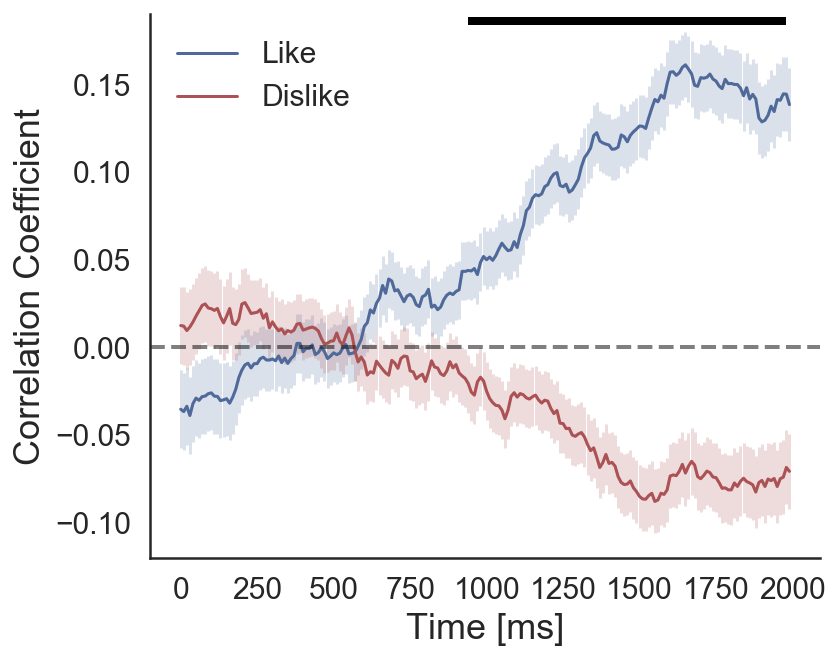

In [315]:

figsize(6, 5)

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectCorr_like))) * 10

plt.errorbar(xSecs,instantEffectCorr_like.param, yerr= instantEffectCorr_like.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike.param, yerr= instantEffectCorr_dislike.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1])

plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

#m = len(instantEffectCorr_like.p) # number of hypothesis tested (for multiple comparison bonferroni correction)

# FDR correction 0.01 (instead of bonferroni)
_,p_value_like_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_like.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)
_,p_value_dislike_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_dislike.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)

clusterSize = 6

for ii in range(len(p_value_like_fdr)):
    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
    if np.sum(p_value_like_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
            plt.plot(xSecs[ii-clusterSize:ii], [np.max(instantEffectCorr_like.param)+0.025]*clusterSize, color='black',linewidth=4,solid_capstyle = 'butt')

#for ii in range(len(p_value_dislike_fdr)):
#    # count the number of significant value in the cluster, if over 6 then the cluster is significant 
#    if np.sum(p_value_dislike_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
#            plt.plot(xSecs[ii-clusterSize:ii], [np.min(instantEffectCorr_dislike.param)-0.025]*clusterSize, color=colorP[1],linewidth=4,solid_capstyle = 'butt')
        
plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

plt.ylim(-0.12, 0.19)
#plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False,fontsize=15)
sns.set_style("white")
sns.despine()

## 2. Instantaneous DT effect on time from the end of the trial

In [68]:

def instantCorrFixPref_inv (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_fix = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        ddt_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if abs(-1-i) <= len(data_exp_1.fixTimeln[j]):
                ddt_timept.append(data_exp_1.fixTimeln[j][-1-i])
            else:
                ddt_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['fix_instant'] = ddt_timept  
        data_exp_ref['fix_instant'] = data_exp_ref['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  

 #       data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
#  regFormula = "Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_instant "
#  ols_instant = logit(formula = regFormula, data=data_exp_ref).fit(disp = 0)
#  lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
#  highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # use correlation
        fix_ins = data_exp_ref['fix_instant'].values
        dvals = data_exp_ref['zDVal'].values
        nas = np.logical_or(np.isnan(fix_ins), np.isnan(dvals))
        corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])
        n_corr =  len(data_exp_ref['fix_instant']) - np.sum(np.isnan(data_exp_ref['fix_instant']))
        corr_SE = (1-corr[0]*corr[0])/sqrt((n_corr-2))  # equation for Standard Error 

        params_instant_fix.append([corr[0], corr_SE])       
        
    params_instant_fix = pd.DataFrame(params_instant_fix,columns=['param','paramSE'])

    return params_instant_fix

In [69]:
instantEffectCorr_like_inv = instantCorrFixPref_inv (data_exp_1, time_picked = 2000)
instantEffectCorr_dislike_inv = instantCorrFixPref_inv (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectCorr_like))) * 10

plt.errorbar(xSecs,instantEffectCorr_like.param, yerr= instantEffectCorr_like.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike.param, yerr= instantEffectCorr_dislike.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1])

plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

m = len(instantEffectCorr_like.p) # number of hypothesis tested (for multiple comparison bonferroni correction)
for ii in range(len(instantEffectCorr_like.p)):
    if instantEffectCorr_like.p[ii]<0.05/m:
        plt.text(xSecs[ii], np.max(instantEffectCorr_like.param)+0.025, ".",  color=colorP[0], size=40)
    if instantEffectCorr_dislike.p[ii]<0.05/m:
        plt.text(xSecs[ii],np.min(instantEffectCorr_dislike.param)-0.025 , ".",  color=colorP[1], size=40)

plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.ylim(-0.12, 0.18)
#plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False)
sns.set_style("white")
sns.despine()

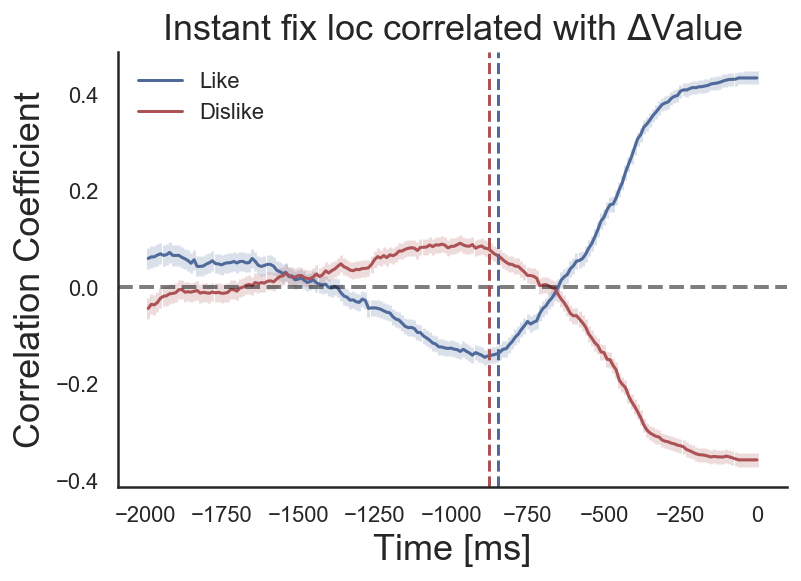

In [361]:


# #xsecs = range(0,len(instantEffectDDT_like))
# colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
# labFrame = ['Like','Dislike']
# xSecs = np.array(range(0,-len(instantEffectCorr_like_inv),-1)) * 10
# 
# plt.errorbar(xSecs,instantEffectCorr_like_inv.param, yerr= instantEffectCorr_like_inv.paramSE , color=colorP[0],marker='', alpha = 0.2 );
# plt.errorbar(xSecs,instantEffectCorr_dislike_inv.param, yerr= instantEffectCorr_dislike_inv.paramSE, color=colorP[1],marker='', alpha = 0.2);
# plot(xSecs,instantEffectCorr_like_inv.param,color=colorP[0],label = labFrame[0])
# plot(xSecs,instantEffectCorr_dislike_inv.param,color=colorP[1],label = labFrame[1])
# 
# 
# plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')
# 
# plt.xlabel("Time [ms]",size=18)
# plt.ylabel("Correlation Coefficient",size=18)
# plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
# plt.legend(frameon=False)
# sns.set_style("white")
# 
# 
# plt.axvline(0 - data_exp_1['LastFixationTime'].mean(), ls='--', color=colorP[0])
# plt.axvline(0 - data_exp_2['LastFixationTime'].mean(), ls='--', color=colorP[1])
# 
# sns.despine()
# 
# 

# Instant fix side correlation with preference ratings (Kovach et al.,  2014,  version)
## Correlation calculated for each participant independently

## 1.Instantaneous DT effect on time from the begining of the trial

In [381]:

def instantCorrFixPref (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_fix = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        fix_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if i < len(data_exp_1.fixTimeln[j]):
                fix_timept.append(data_exp_1.fixTimeln[j][i])
            else:
                fix_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['fix_instant'] = fix_timept
        data_exp_ref['fix_instant'] = data_exp_ref['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  
        
        #data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
        #regFormula = "fix_instant ~ zDVal"
        #ols_instant = logit(formula = regFormula, data=data_exp_ref, missing='drop').fit(disp = 0)
        #lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
        #highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # extract instant DDT parameter 
        #params_instant_ddt.append([ols_instant.params.values[-1],lowLim_inst[-1],highLim_inst[-1]])        
        
        # extract participant
        
        corr_part = []
        corr_SE_part = []
        for ii in data_exp_ref.Part.unique():
            data_exp_ref_part = data_exp_ref.loc[data_exp_ref.Part == ii]
        
            # calculate  correlation for this participants
            fix_ins = data_exp_ref_part['fix_instant'].values
            dvals = data_exp_ref_part['zDVal'].values
            nas = np.logical_or(np.isnan(fix_ins), np.isnan(dvals))
            corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])
            n_corr =  len(data_exp_ref_part['fix_instant']) - np.sum(np.isnan(data_exp_ref_part['fix_instant'])) # estimating the number of trials removing nans
            corr_SE = (1-corr[0]*corr[0])/sqrt((n_corr-2))  # equation for Standard Error 
            
            corr_part.append(corr[0])
            corr_SE_part.append(corr_SE)
        
        corr_mean_part = np.nanmean(corr_part)
        corr_SE_part = stats.sem(corr_part, nan_policy = 'omit')        
        params_instant_fix.append([corr_mean_part, corr_SE_part])   
        
        
    params_instant_fix = pd.DataFrame(params_instant_fix,columns=['param','paramSE'])

    return params_instant_fix

In [382]:
instantEffectCorr_like = instantCorrFixPref (data_exp_1, time_picked = 2000)
instantEffectCorr_dislike = instantCorrFixPref (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


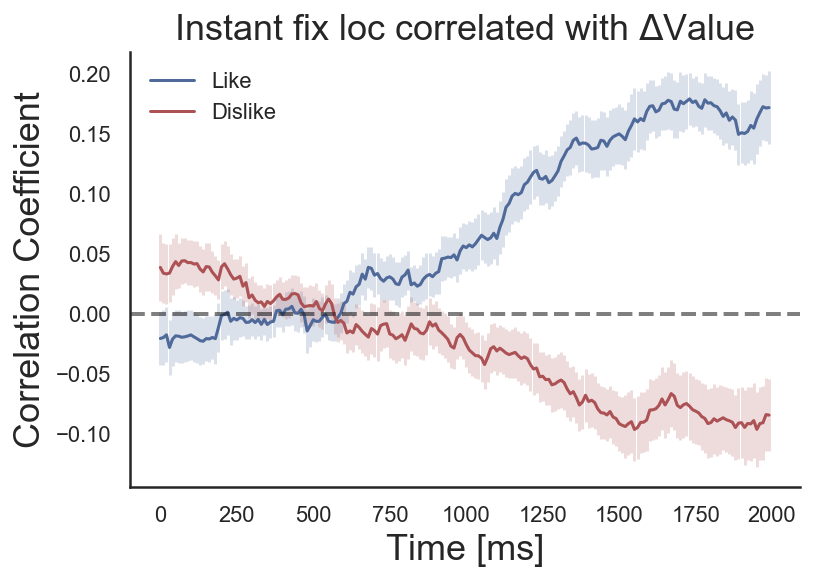

In [383]:

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectDDT_like))) * 10

plt.errorbar(xSecs,instantEffectCorr_like.param, yerr= instantEffectCorr_like.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike.param, yerr= instantEffectCorr_dislike.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1])


plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False)
sns.set_style("white")
sns.despine()

## 2. Instantaneous DT effect on time from the end of the trial

In [384]:

def instantCorrFixPref_inv (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_fix = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        ddt_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if abs(-1-i) <= len(data_exp_1.fixTimeln[j]):
                ddt_timept.append(data_exp_1.fixTimeln[j][-1-i])
            else:
                ddt_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['fix_instant'] = ddt_timept  
        data_exp_ref['fix_instant'] = data_exp_ref['fix_instant'] - 1 # we substract to leave the fixation code as 0 for left side and 1 for right side  

 #       data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
#  regFormula = "Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_instant "
#  ols_instant = logit(formula = regFormula, data=data_exp_ref).fit(disp = 0)
#  lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
#  highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        corr_part = []
        corr_SE_part = []
        for ii in data_exp_ref.Part.unique():
            data_exp_ref_part = data_exp_ref.loc[data_exp_ref.Part == ii]
        
            # calculate  correlation for this participants
            fix_ins = data_exp_ref_part['fix_instant'].values
            dvals = data_exp_ref_part['zDVal'].values
            nas = np.logical_or(np.isnan(fix_ins), np.isnan(dvals))
            corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])
            n_corr =  len(data_exp_ref_part['fix_instant']) - np.sum(np.isnan(data_exp_ref_part['fix_instant'])) # estimating the number of trials removing nans
            corr_SE = (1-corr[0]*corr[0])/sqrt((n_corr-2))  # equation for Standard Error 
            
            corr_part.append(corr[0])
            corr_SE_part.append(corr_SE)
        
        corr_mean_part = np.nanmean(corr_part)
        corr_SE_part = stats.sem(corr_part, nan_policy = 'omit')        
        params_instant_fix.append([corr_mean_part, corr_SE_part])   
        
    params_instant_fix = pd.DataFrame(params_instant_fix,columns=['param','paramSE'])

    return params_instant_fix

In [385]:
instantEffectCorr_like_inv = instantCorrFixPref_inv (data_exp_1, time_picked = 2000)
instantEffectCorr_dislike_inv = instantCorrFixPref_inv (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


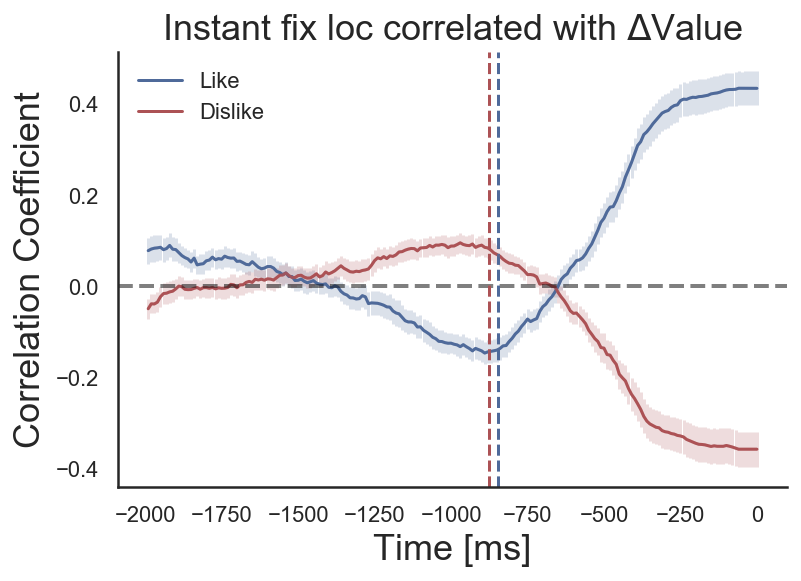

In [386]:


#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,-len(instantEffectCorr_like_inv),-1)) * 10

plt.errorbar(xSecs,instantEffectCorr_like_inv.param, yerr= instantEffectCorr_like_inv.paramSE , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectCorr_dislike_inv.param, yerr= instantEffectCorr_dislike_inv.paramSE, color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectCorr_like_inv.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectCorr_dislike_inv.param,color=colorP[1],label = labFrame[1])


plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

plt.xlabel("Time [ms]",size=18)
plt.ylabel("Correlation Coefficient",size=18)
plt.title("Instant fix loc correlated with $\Delta$Value",size=18)
plt.legend(frameon=False)
sns.set_style("white")


plt.axvline(0 - data_exp_1['LastFixationTime'].mean(), ls='--', color=colorP[0])
plt.axvline(0 - data_exp_2['LastFixationTime'].mean(), ls='--', color=colorP[1])

sns.despine()



# Instant DDT effect on Choice (regression version)

## 1.Instantaneous DT effect on time from the begining of the trial

In [136]:

def instantEffectDDT (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_ddt = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        ddt_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if i < len(data_exp_1.ddtTimeln[j]):
                ddt_timept.append(data_exp_1.ddtTimeln[j][i])
            else:
                ddt_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['ddt_instant'] = ddt_timept  
        data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
        regFormula = "Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_instant "
        ols_instant = logit(formula = regFormula, data=data_exp_ref, missing='drop').fit(disp = 0)
        lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
        highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # extract instant DDT parameter 
        params_instant_ddt.append([ols_instant.params.values[-1],lowLim_inst[-1],highLim_inst[-1]])        
        
    params_instant_ddt = pd.DataFrame(params_instant_ddt,columns=['param','lowLim','highLim'])

    return params_instant_ddt

In [137]:
instantEffectDDT_like = instantEffectDDT (data_exp_1, time_picked = 2000)
instantEffectDDT_dislike = instantEffectDDT (data_exp_2, time_picked = 2000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


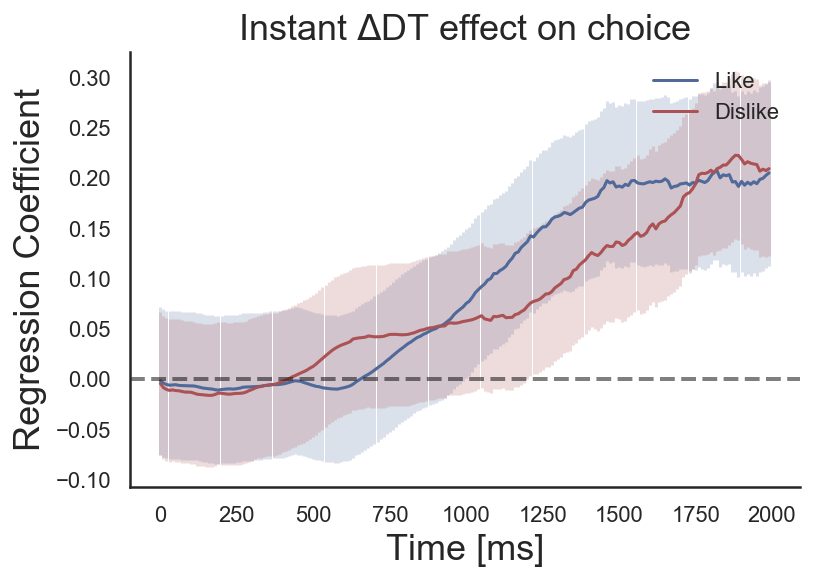

In [144]:

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,len(instantEffectDDT_like))) * 10

plt.errorbar(xSecs,instantEffectDDT_like.param, yerr= (instantEffectDDT_like.highLim - instantEffectDDT_like.lowLim)/2 , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectDDT_dislike.param, yerr= (instantEffectDDT_dislike.highLim - instantEffectDDT_dislike.lowLim)/2  , color=colorP[1],marker='', alpha = 0.2);
plot(xSecs,instantEffectDDT_like.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectDDT_dislike.param,color=colorP[1],label = labFrame[1])


plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')

plt.xlabel("Time [ms]",size=18)
plt.ylabel("Regression Coefficient",size=18)
plt.title("Instant $\Delta$DT effect on choice",size=18)
plt.legend(frameon=False)
sns.set_style("white")
sns.despine()

In [63]:
data_exp_1.RT.mean()

2858.202150537634

In [64]:
data_exp_1.LastFixationTime.mean()

847.0153225806451

## 2. Instantaneous DT effect on time from the end of the trial

In [146]:

def instantEffectDDT_inv (data_exp_1, time_picked = 2000):
    nTrialsTotal =  len(data_exp_1)
    data_exp_ref = data_exp_1[['Part','Choice','zDVal','zConf','zTotVal', 'zDDT_nonLast']]
    time_analysis = time_picked # in miliseconds
    params_instant_ddt = []
    for  i in range(0,int(time_analysis/10)): # across time (in this case 10ms is the size of the initial segmentation)
        ddt_timept = []
        for j in range(0, nTrialsTotal):# extract for all trials
            if abs(-1-i) <= len(data_exp_1.ddtTimeln[j]):
                ddt_timept.append(data_exp_1.ddtTimeln[j][-1-i])
            else:
                ddt_timept.append(np.nan) # ignore this trial and continue to the next one
        # include instantaneous ddt measure in the dataframe           
        data_exp_ref['ddt_instant'] = ddt_timept  
        data_exp_ref["zDDT_instant"] = z_score1(data_exp_ref,'Part',"ddt_instant")
    
        # fit regression using that dataframe
        regFormula = "Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zDDT_instant "
        ols_instant = logit(formula = regFormula, data=data_exp_ref).fit(disp = 0)
        lowLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[0].values
        highLim_inst = ols_instant.conf_int(alpha=0.05, cols=None)[1].values

        # extract instant DDT parameter 
        params_instant_ddt.append([ols_instant.params.values[-1],lowLim_inst[-1],highLim_inst[-1]])        
        
    params_instant_ddt = pd.DataFrame(params_instant_ddt,columns=['param','lowLim','highLim'])

    return params_instant_ddt

In [198]:
instantEffectDDT_like_inv = instantEffectDDT_inv (data_exp_1, time_picked = 5000)
instantEffectDDT_dislike_inv = instantEffectDDT_inv (data_exp_2, time_picked = 5000)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


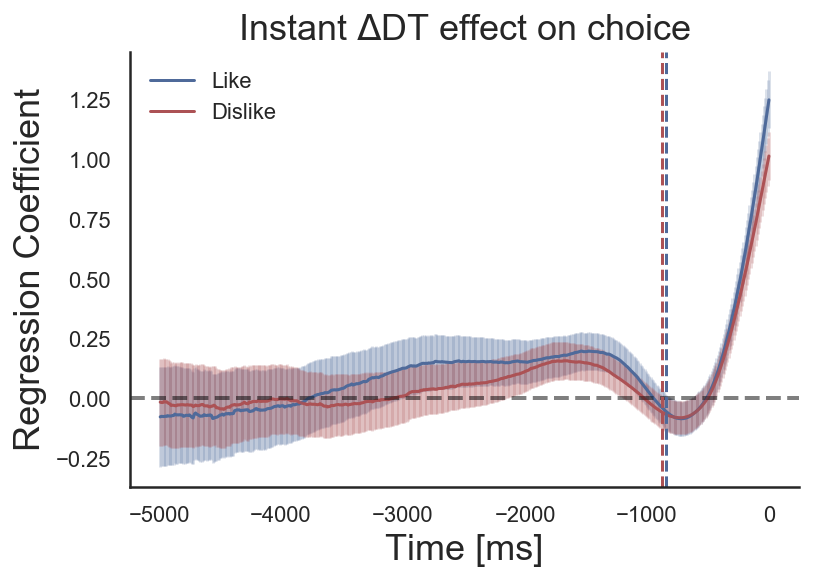

In [199]:

#xsecs = range(0,len(instantEffectDDT_like))
colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
labFrame = ['Like','Dislike']
xSecs = np.array(range(0,-len(instantEffectDDT_like_inv),-1)) * 10


plt.errorbar(xSecs,instantEffectDDT_like_inv.param, yerr= (instantEffectDDT_like_inv.highLim - instantEffectDDT_like_inv.lowLim)/2 , color=colorP[0],marker='', alpha = 0.2 );
plt.errorbar(xSecs,instantEffectDDT_dislike_inv.param, yerr= (instantEffectDDT_dislike_inv.highLim - instantEffectDDT_dislike_inv.lowLim)/2  , color=colorP[1],marker='', alpha = 0.2);

plot(xSecs,instantEffectDDT_like_inv.param,color=colorP[0],label = labFrame[0])
plot(xSecs,instantEffectDDT_dislike_inv.param,color=colorP[1],label = labFrame[1])
plt.axhline(0, color='black', lw=2, alpha=0.5,ls = '--')


#plt.xticks(np.array(range(0,len(instantEffectDDT_like_inv)))*10,np.array(range(-len(instantEffectDDT_like_inv),0))*10)
plt.xlabel("Time [ms]",size=18)
plt.ylabel("Regression Coefficient",size=18)
plt.title("Instant $\Delta$DT effect on choice",size=18)
plt.legend(frameon=False)
sns.set_style("white")


plt.axvline(0 - data_exp_1['LastFixationTime'].mean(), ls='--', color=colorP[0])
plt.axvline(0 - data_exp_2['LastFixationTime'].mean(), ls='--', color=colorP[1])

sns.despine()

# Proportion of trial time per fixation

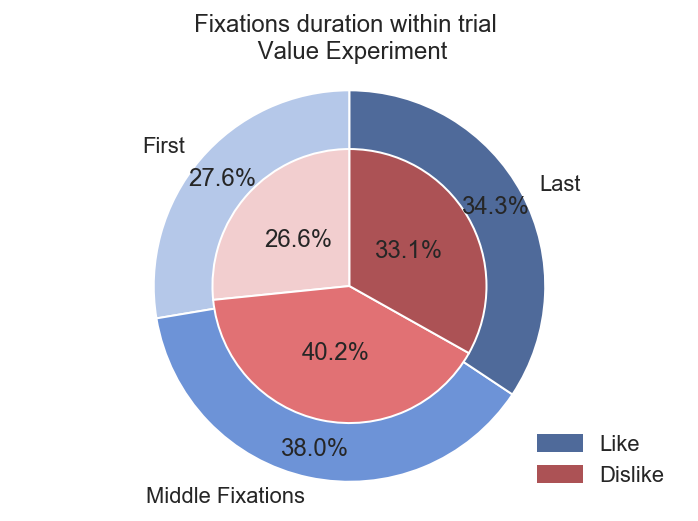

In [142]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'First', 'Middle Fixations', 'Last'

size = 0.3
pie_firstFix_1 =data_exp_1['1stFixationTime']/data_exp_1['RT']
pie_midFix_1 =data_exp_1['middleFixTime']/data_exp_1['RT']
pie_lastFix_1 =data_exp_1['LastFixationTime']/data_exp_1['RT']

pie_firstFix_2 =data_exp_2['1stFixationTime']/data_exp_2['RT']
pie_midFix_2 =data_exp_2['middleFixTime']/data_exp_2['RT']
pie_lastFix_2 =data_exp_2['LastFixationTime']/data_exp_2['RT']

sizes_1 = [pie_firstFix_1.mean(), pie_midFix_1.mean(), pie_lastFix_1.mean()]
sizes_2 = [pie_firstFix_2.mean(), pie_midFix_2.mean(), pie_lastFix_2.mean()]

explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']


inner_colors = ['#F2CECF','#e17174','#AC5255'] # red
outer_colors = ['#B5C8E9','#6d93d7','#4F6A9A'] # blue

fig1, ax1 = plt.subplots()
ax1.pie(sizes_1, explode=explode, radius=1,labels=labels, colors=outer_colors, autopct='%1.1f%%', pctdistance=0.85,
        shadow=False, startangle=90)
ax1.pie(sizes_2, explode=explode, radius=1 - size, colors=inner_colors, autopct='%1.1f%%',pctdistance=0.5,
        shadow=False, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fixations duration within trial \n Value Experiment')

blue_patch = mpatches.Patch(color='#4F6A9A', label='Like')
red_patch = mpatches.Patch(color='#AC5255', label='Dislike')
plt.legend(handles=[blue_patch,red_patch],frameon=False)

plt.show()


# Hierarchical regressions for first, middle and last DDT

## 1.  First Fixation DDT Regression

### Dislike Condition

In [94]:
%%R

if (file.exists('SavedModels/HModel_Choice_Dislike_FirstFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Dislike_FirstFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal  + zDDT_firstFix  + zDVal:zConf | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_FirstFixDDT_31_m1.rda")
}

[1] "  Found old parameter estimates in \"SavedModels/\". Skipping estimation..."


In [95]:
%%R
Choice_Dislike_hmodel

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf |          Part)
   Data: data_exp1_DisLike
      AIC       BIC    logLik  deviance  df.resid 
 4204.859  4372.839 -2075.430  4150.859      3693 
Random effects:
 Groups Name          Std.Dev. Corr                         
 Part   (Intercept)   0.009254                              
        zDVal         0.914070 -0.22                        
        zConf         0.082909  0.59 -0.92                  
        zTotVal       0.010991 -0.80 -0.40  0.01            
        zDDT_firstFix 0.041208 -0.95 -0.08 -0.32  0.95      
        zDVal:zConf   0.414741 -0.81  0.75 -0.95  0.30  0.60
Number of obs: 3720, groups:  Part, 31
Fixed Effects:
  (Intercept)          zDVal          zConf        zTotVal  zDDT_firstFix  
      0.02884       -1.

In [96]:
%%R

# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf |          Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  4204.9   4372.8  -2075.4   4150.9     3693 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.1840 -0.8408  0.0169  0.8403 10.0335 

Random effects:
 Groups Name          Variance  Std.Dev. Corr                         
 Part   (Intercept)   8.564e-05 0.009254                              
        zDVal         8.355e-01 0.914070 -0.22                        
        zConf         6.874e-03 0.082909  0.59 -0.92                  
        zTotVal       1.208e-04 0.010991 -0.80 -0.40  0.01            
        zDDT_firstFix 1.698e-03 0.041208 -0.95 -0.08

In [97]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

In [98]:
Choice_Dislike_hmodel_table

,Inter,ΔValue,Confidence,ΣValue,ΔDT,ΔValue x Conf
coefficient,0.028841,-1.405949,0.011410,0.029330,0.018655,-0.522753
se,0.040689,0.178027,0.040716,0.038572,0.038382,0.092435
CImin,-0.050909,-1.754883,-0.068394,-0.046270,-0.056574,-0.703924
CImax,0.108591,-1.057016,0.091213,0.104931,0.093884,-0.341581


### Like Condition

In [99]:
%%R
if (file.exists('SavedModels/HModel_Choice_Like_FirstFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Like_FirstFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~  zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf  | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_FirstFixDDT_31_m1.rda")
}

[1] "  Found old parameter estimates in \"SavedModels/\". Skipping estimation..."


In [100]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_firstFix + zDVal:zConf |          Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  3974.8   4142.8  -1960.4   3920.8     3693 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.1928 -0.7947 -0.0027  0.8011  6.5831 

Random effects:
 Groups Name          Variance  Std.Dev. Corr                         
 Part   (Intercept)   0.0000000 0.00000                               
        zDVal         1.1090834 1.05313    NaN                        
        zConf         0.0021363 0.04622    NaN -0.99                  
        zTotVal       0.0008732 0.02955    NaN  0.98 -0.95            
        zDDT_firstFix 0.0163384 0.12782    NaN  0.25 -0

In [101]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.0; t =  3.1541970325050836e+16 ; p-value =0.0***
Inter : MeanD = 0.03; t =  23.27714 ; p-value =0.0***
ΔValue : MeanL = 1.51; t =  8.55349 ; p-value =0.0***
ΔValue : MeanD = -1.36; t =  -8.98297 ; p-value =0.0***
Confidence : MeanL = -0.07; t =  -9.68429 ; p-value =0.0***
Confidence : MeanD = 0.01; t =  0.58 ; p-value =0.57
ΣValue : MeanL = 0.02; t =  3.94023 ; p-value =0.00045***
ΣValue : MeanD = 0.03; t =  19.63257 ; p-value =0.0***
ΔDT : MeanL = 0.07; t =  5.61872 ; p-value =0.0***
ΔDT : MeanD = 0.02; t =  3.5 ; p-value =0.0**
ΔValue
 x   
Conf : MeanL = 0.66; t =  10.64541 ; p-value =0.0***
ΔValue
 x   
Conf : MeanD = -0.51; t =  -7.9728 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.0; MeanD = 0.02869; [Like - Dislike] =  -0.0; t =  -22.26388 ; p-value =0.0***
ΔValue : MeanL = 1.51; MeanD = -1.36489; [Like - Dislike] =  3.0; t =  9.51977 ; p

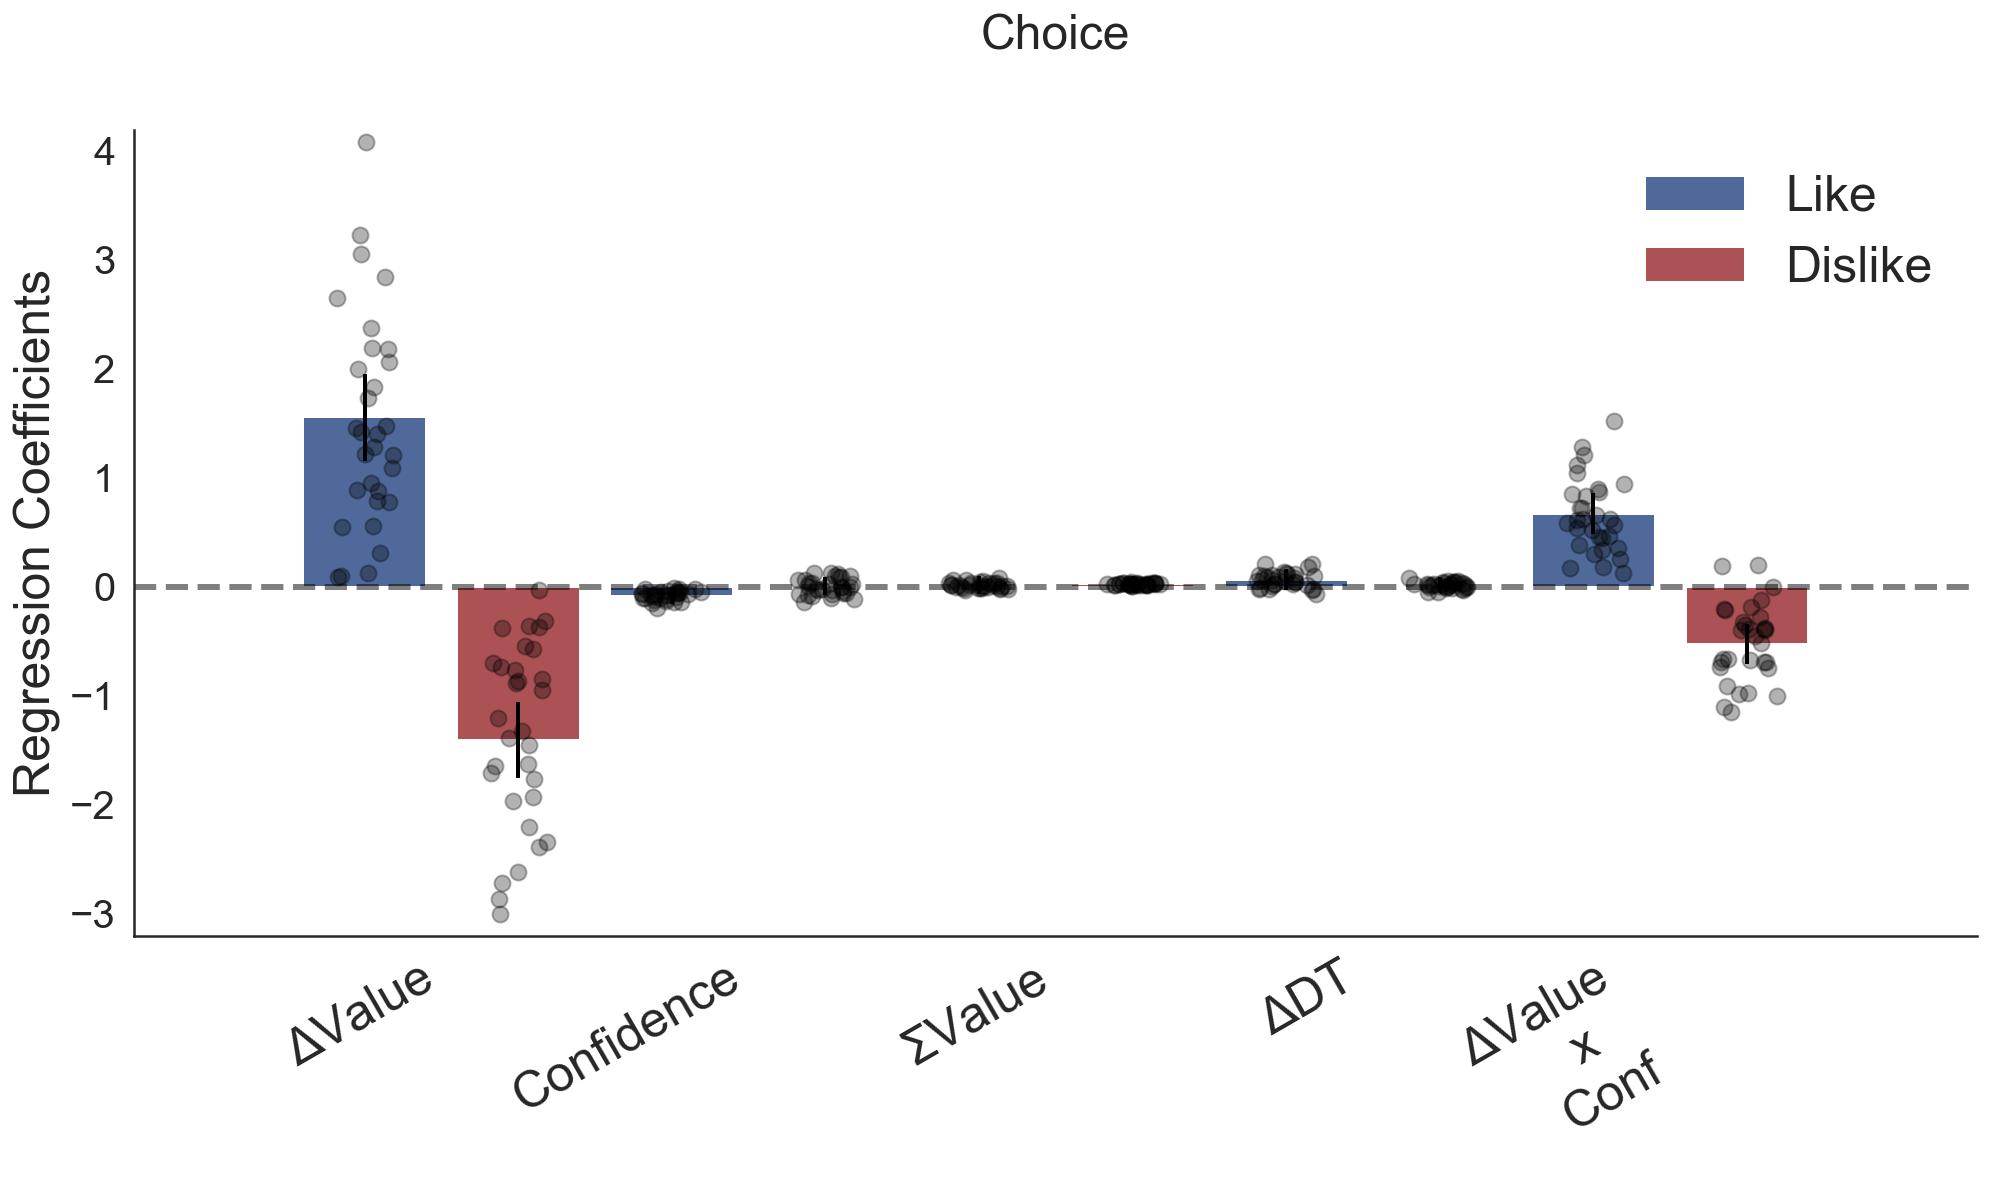

In [102]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

Choice_Like_hmodel_table

mix_Choice_Like_model

Choice_Dislike_hmodel_table

mix_Choice_Dislike_model

Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20)
plt.xlim(0, 6)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

## 2.  Middle Fixation DDT Regression

### Dislike Condition

In [64]:
%%R

if (file.exists('SavedModels/HModel_Choice_Dislike_MidFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Dislike_MidFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal  + zDDT_midFix  + zDVal:zConf | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_MidFixDDT_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_midFix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf | 
    Part), data = data_exp1_DisLike, family = "binomial", control = glmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept)  0.01     0.05  
zDVal       -1.37     0.18  
zConf       -0.01     0.04  
zTotVal      0.05     0.04  
zDDT_midFix -1.25     0.14  
zDVal:zConf -0.51     0.09  

Error terms:
 Groups   Name        Std.Dev. Corr                          
 Part     (Intercept) 0.06                                   
          zDVal       0.89      0.61                         
          zConf       0.05     -0.77 -0.77                   
          zTotVal     0.04     -0.09  0.43 -0.57             
          zDDT_midFix 0.69      0.40 -0.40  0.23 -0.87       
          zDVal:zConf 0.35      0.42  0.77 -0.90  0.86 -0.64 
 Residual             1.00                                   
---

In [65]:
%%R

# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf | Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  3546.2   3714.1  -1746.1   3492.2     3672 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-60.278  -0.566   0.020   0.589  16.533 

Random effects:
 Groups Name        Variance Std.Dev. Corr                         
 Part   (Intercept) 0.003071 0.05541                               
        zDVal       0.791060 0.88942   0.61                        
        zConf       0.002916 0.05400  -0.77 -0.77                  
        zTotVal     0.002009 0.04483  -0.09  0.43 -0.57            
        zDDT_midFix 0.474571 0.68889   0.40 -0.40  0.23 -0.87      
        zDVa

In [66]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

In [67]:
Choice_Dislike_hmodel_table

,Inter,ΔValue,Confidence,ΣValue,ΔDT,ΔValue x Conf
coefficient,0.009863,-1.366511,-0.012693,0.054724,-1.250015,-0.511746
se,0.046781,0.175778,0.044853,0.044122,0.139315,0.086374
CImin,-0.081828,-1.711036,-0.100605,-0.031756,-1.523073,-0.681039
CImax,0.101553,-1.021986,0.075219,0.141203,-0.976957,-0.342453


### Like Condition

In [68]:
%%R
if (file.exists('SavedModels/HModel_Choice_Like_MidFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Like_MidFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~  zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf  | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_MidFixDDT_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_midFix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf | 
    Part), data = data_exp1_Like, family = "binomial", control = glmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
            coef.est coef.se
(Intercept)  0.04     0.05  
zDVal        1.49     0.20  
zConf       -0.07     0.05  
zTotVal      0.01     0.05  
zDDT_midFix -1.67     0.19  
zDVal:zConf  0.64     0.09  

Error terms:
 Groups   Name        Std.Dev. Corr                          
 Part     (Intercept) 0.10                                   
          zDVal       1.02      0.20                         
          zConf       0.06     -0.26 -0.77                   
          zTotVal     0.03     -0.58  0.54 -0.05             
          zDDT_midFix 0.98     -0.62  0.39 -0.59  0.45       
          zDVal:zConf 0.28      0.44  0.91 -0.93  0.15  0.36 
 Residual             1.00                                   
---
nu

In [69]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_midFix + zDVal:zConf | Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  3148.8   3316.7  -1547.4   3094.8     3683 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1333.04    -0.46     0.00     0.47     8.82 

Random effects:
 Groups Name        Variance  Std.Dev. Corr                         
 Part   (Intercept) 0.0102507 0.10125                               
        zDVal       1.0482422 1.02384   0.20                        
        zConf       0.0033564 0.05793  -0.26 -0.77                  
        zTotVal     0.0006946 0.02636  -0.58  0.54 -0.05            
        zDDT_midFix 0.9641362 0.98190  -0.62  0.39 -0.59  0.45      

In [70]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

In [71]:
### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.03; t =  2.37 ; p-value =0.02*
Inter : MeanD = 0.01; t =  1.71 ; p-value =0.1
ΔValue : MeanL = 1.45; t =  8.54 ; p-value =0.0**
ΔValue : MeanD = -1.33; t =  -8.99 ; p-value =0.0**
Confidence : MeanL = -0.07; t =  -8.38 ; p-value =0.0**
Confidence : MeanD = -0.02; t =  -1.97 ; p-value =0.06
ΣValue : MeanL = 0.01; t =  3.67 ; p-value =0.0**
ΣValue : MeanD = 0.05; t =  7.69 ; p-value =0.0**
ΔDT : MeanL = -1.62; t =  -9.92 ; p-value =0.0**
ΔDT : MeanD = -1.22; t =  -10.72 ; p-value =0.0**
ΔValue
 x   
Conf : MeanL = 0.63; t =  14.44 ; p-value =0.0**
ΔValue
 x   
Conf : MeanD = -0.51; t =  -9.39 ; p-value =0.0**
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.03; MeanD = 0.01; [Like - Dislike] =  0.0; t =  1.004 ; p-value =0.323
ΔValue : MeanL = 1.45; MeanD = -1.33; [Like - Dislike] =  3.0; t =  9.674 ; p-value =0.0**
Confidence : MeanL = -0.07; MeanD = -0.02; [Like - D

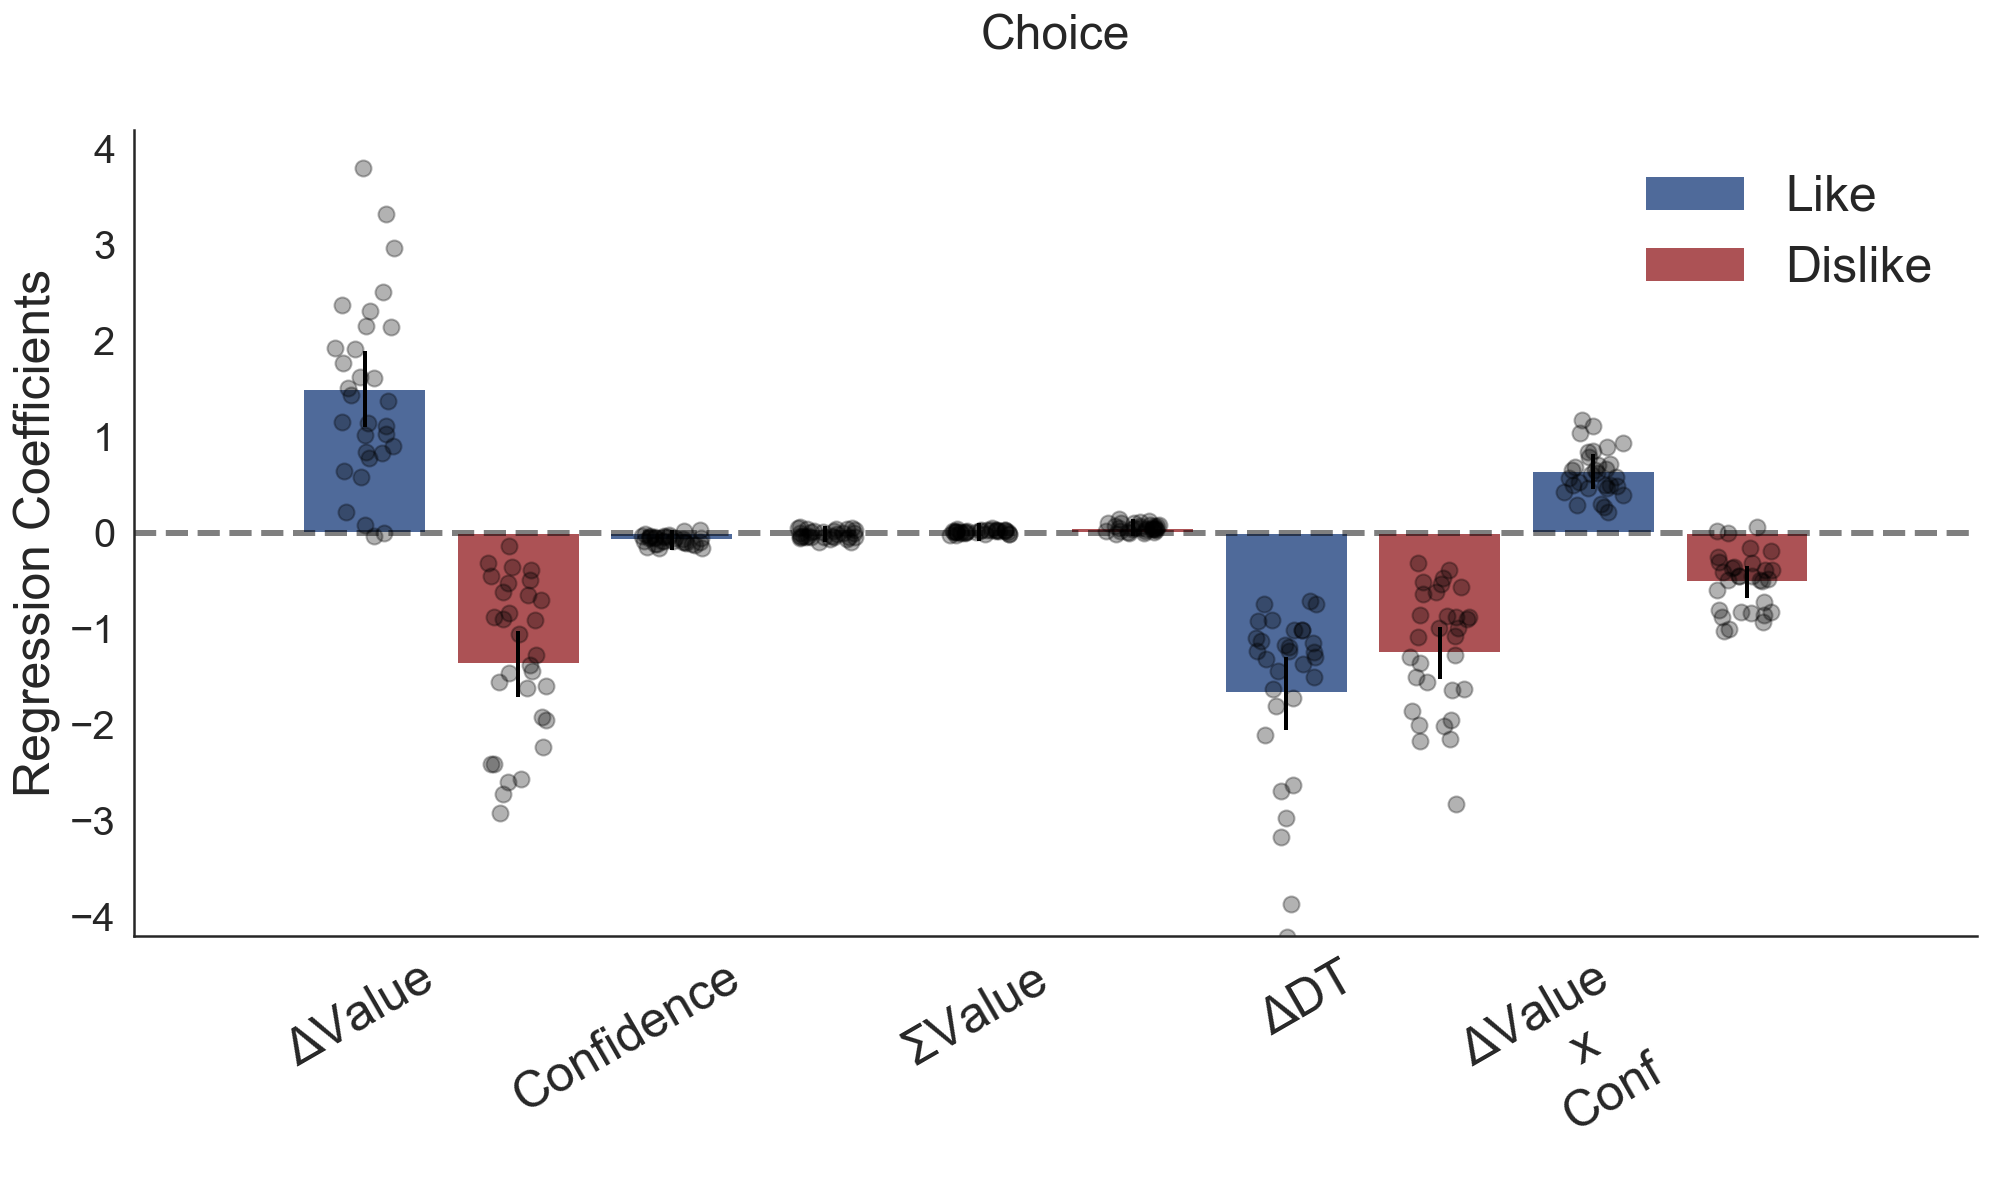

In [72]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

Choice_Like_hmodel_table

mix_Choice_Like_model

Choice_Dislike_hmodel_table

mix_Choice_Dislike_model

Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20)
plt.xlim(0, 6)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

## 3.  Last Fixation DDT Regression

### Dislike Condition

In [73]:
%%R

if (file.exists('SavedModels/HModel_Choice_Dislike_LastFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Dislike_LastFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal  + zDDT_lastFix  + zDVal:zConf | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_LastFixDDT_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_lastFix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf | 
    Part), data = data_exp1_DisLike, family = "binomial", control = glmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
             coef.est coef.se
(Intercept)  -0.15     0.11  
zDVal        -1.06     0.18  
zConf        -0.07     0.10  
zTotVal      -0.04     0.11  
zDDT_lastFix  5.47     0.72  
zDVal:zConf  -0.62     0.14  

Error terms:
 Groups   Name         Std.Dev. Corr                          
 Part     (Intercept)  0.15                                   
          zDVal        0.71      0.65                         
          zConf        0.04     -0.60 -0.14                   
          zTotVal      0.12     -0.49 -0.45 -0.38             
          zDDT_lastFix 3.59     -0.10  0.66  0.57 -0.34       
          zDVal:zConf  0.35      0.40  0.85 -0.33  0.08  0.58 
 Residual              1.00                      

In [74]:
%%R

# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf | Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  1565.6   1733.6   -755.8   1511.6     3693 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-100.573   -0.121    0.000    0.142   83.456 

Random effects:
 Groups Name         Variance  Std.Dev. Corr                         
 Part   (Intercept)   0.022516 0.15005                               
        zDVal         0.504360 0.71018   0.65                        
        zConf         0.001233 0.03511  -0.60 -0.14                  
        zTotVal       0.015409 0.12413  -0.49 -0.45 -0.38            
        zDDT_lastFix 12.913416 3.59352  -0.10  0.66  0.57 

In [75]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

In [76]:
Choice_Dislike_hmodel_table

,Inter,ΔValue,Confidence,ΣValue,ΔDT,ΔValue x Conf
coefficient,-0.145856,-1.058412,-0.069452,-0.038817,5.465926,-0.624678
se,0.106622,0.178750,0.101025,0.108743,0.716324,0.136154
CImin,-0.354836,-1.408762,-0.267461,-0.251953,4.061931,-0.891540
CImax,0.063124,-0.708063,0.128557,0.174319,6.869920,-0.357816


### Like Condition

In [77]:
%%R
if (file.exists('SavedModels/HModel_Choice_Like_LastFixDDT_31_m1.rda')){
    load('SavedModels/HModel_Choice_Like_LastFixDDT_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~  zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf  | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_LastFixDDT_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_lastFix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf | 
    Part), data = data_exp1_Like, family = "binomial", control = glmerControl(optimizer = "optimx", 
    optCtrl = list(method = "nlminb")))
             coef.est coef.se
(Intercept)   0.16     0.14  
zDVal         1.07     0.22  
zConf        -0.31     0.15  
zTotVal       0.00     0.13  
zDDT_lastFix  5.95     0.69  
zDVal:zConf   0.76     0.19  

Error terms:
 Groups   Name         Std.Dev. Corr                          
 Part     (Intercept)  0.32                                   
          zDVal        0.81      0.02                         
          zConf        0.41     -0.95  0.24                   
          zTotVal      0.19      0.92 -0.37 -0.98             
          zDDT_lastFix 3.21      0.36 -0.34 -0.58  0.48       
          zDVal:zConf  0.48      0.89  0.46 -0.74  0.65  0.20 
 Residual              1.00                         

In [78]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_lastFix + zDVal:zConf | Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  1339.1   1507.1   -642.6   1285.1     3693 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
 -52.64   -0.10    0.00    0.10 1731.43 

Random effects:
 Groups Name         Variance Std.Dev. Corr                         
 Part   (Intercept)   0.10341 0.3216                                
        zDVal         0.65854 0.8115    0.02                        
        zConf         0.16437 0.4054   -0.95  0.24                  
        zTotVal       0.03508 0.1873    0.92 -0.37 -0.98            
        zDDT_lastFix 10.29457 3.2085    0.36 -0.34 -0.58  0.48      
       

In [79]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

In [80]:
### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.15; t =  3.51 ; p-value =0.0**
Inter : MeanD = -0.14; t =  -7.75 ; p-value =0.0**
ΔValue : MeanL = 1.07; t =  9.87 ; p-value =0.0**
ΔValue : MeanD = -1.08; t =  -10.71 ; p-value =0.0**
Confidence : MeanL = -0.29; t =  -5.31 ; p-value =0.0**
Confidence : MeanD = -0.07; t =  -16.31 ; p-value =0.0**
ΣValue : MeanL = -0.0; t =  -0.16 ; p-value =0.87
ΣValue : MeanD = -0.04; t =  -3.07 ; p-value =0.0**
ΔDT : MeanL = 5.5; t =  11.15 ; p-value =0.0**
ΔDT : MeanD = 5.13; t =  9.01 ; p-value =0.0**
ΔValue
 x   
Conf : MeanL = 0.74; t =  11.77 ; p-value =0.0**
ΔValue
 x   
Conf : MeanD = -0.63; t =  -14.01 ; p-value =0.0**
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.15; MeanD = -0.14; [Like - Dislike] =  0.0; t =  6.15 ; p-value =0.0**
ΔValue : MeanL = 1.07; MeanD = -1.08; [Like - Dislike] =  2.0; t =  11.567 ; p-value =0.0**
Confidence : MeanL = -0.29; MeanD = -0.07; [Li

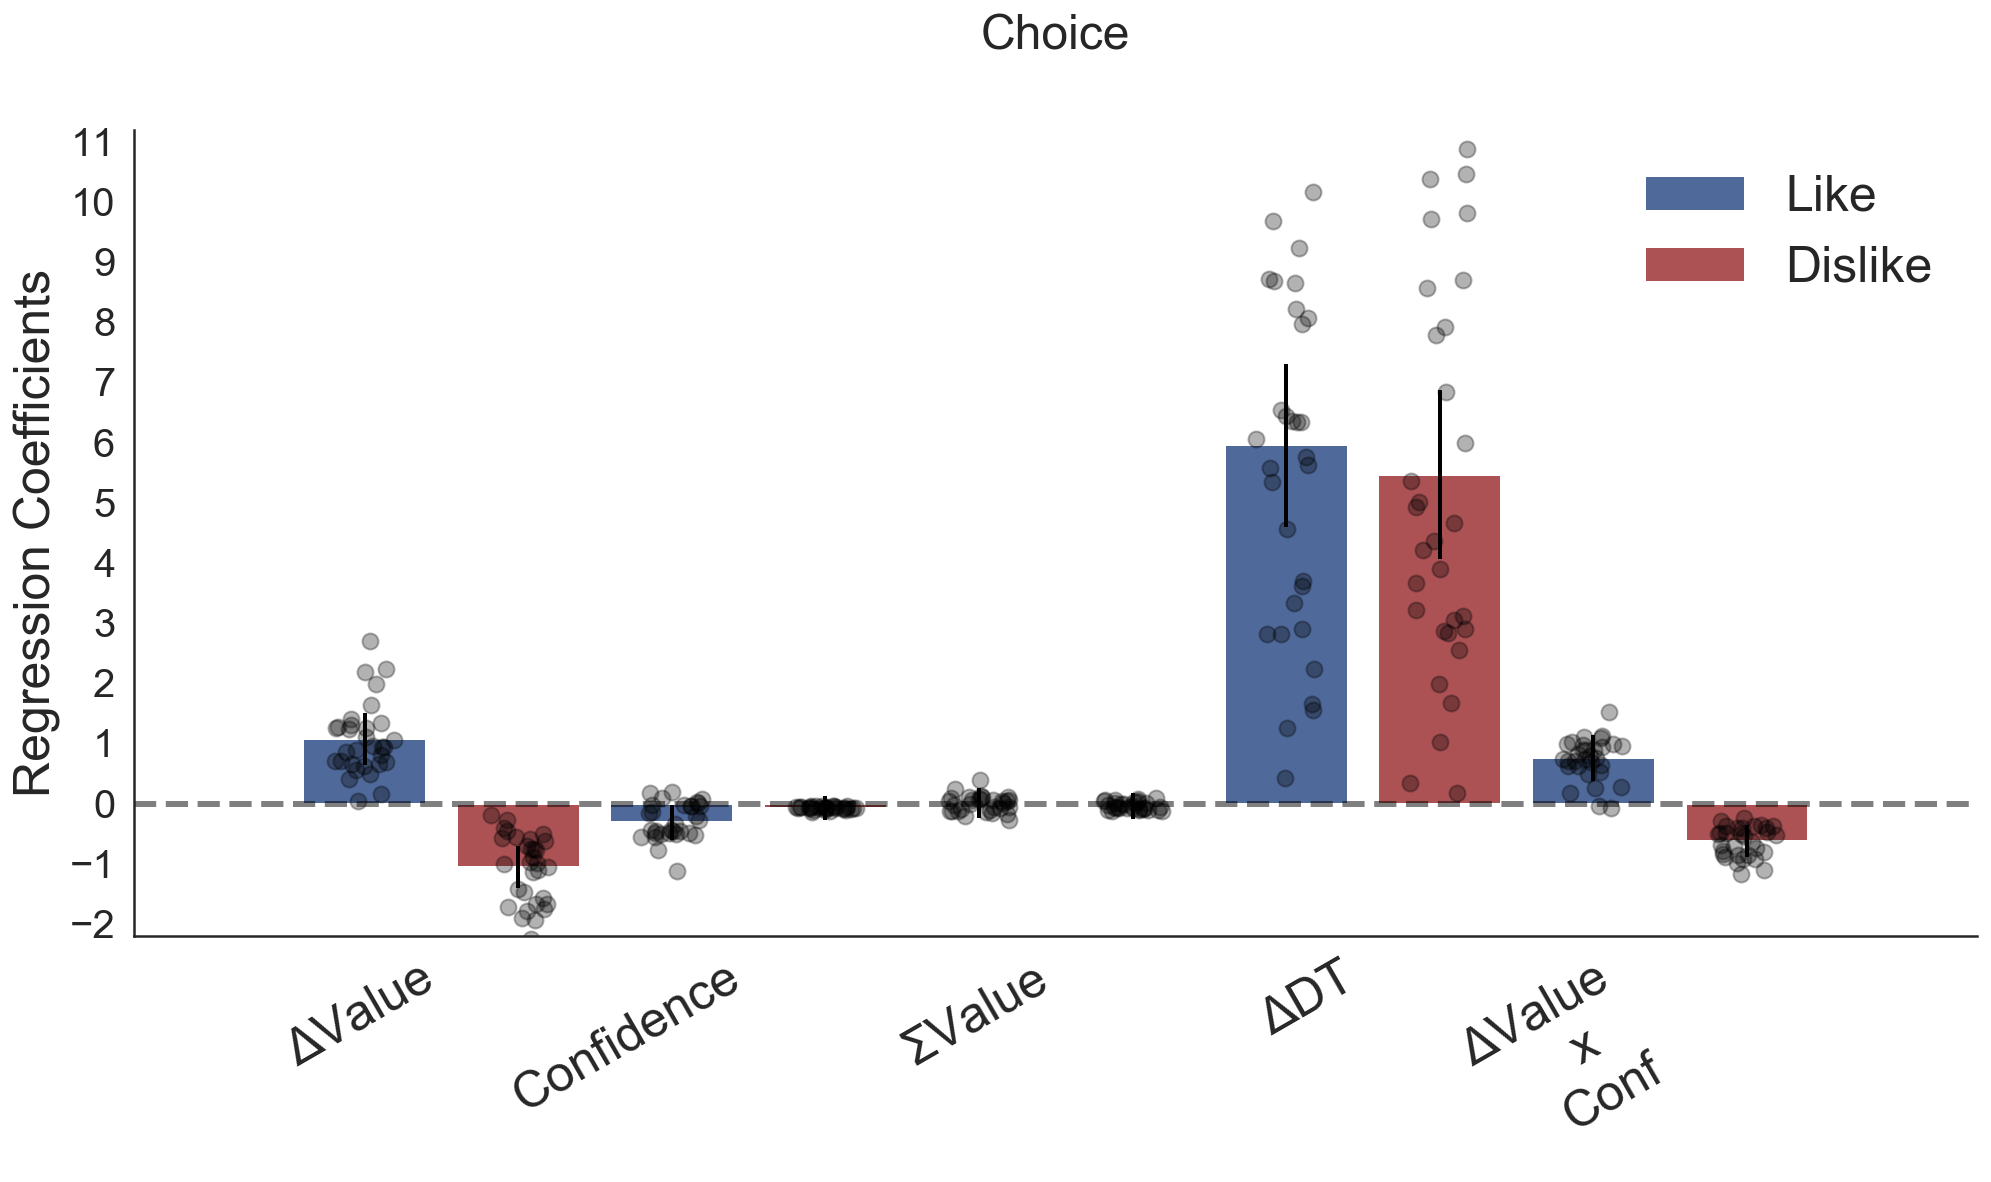

In [81]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

Choice_Like_hmodel_table

mix_Choice_Like_model

Choice_Dislike_hmodel_table

mix_Choice_Dislike_model

Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20)
plt.xlim(0, 6)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

#  Last fixation duration vs DValue

Like
r = -0.060243141610151874; p = 0.0002365093714783218
Dislike
r = -0.038883017917252204; p = 0.017709088066213654


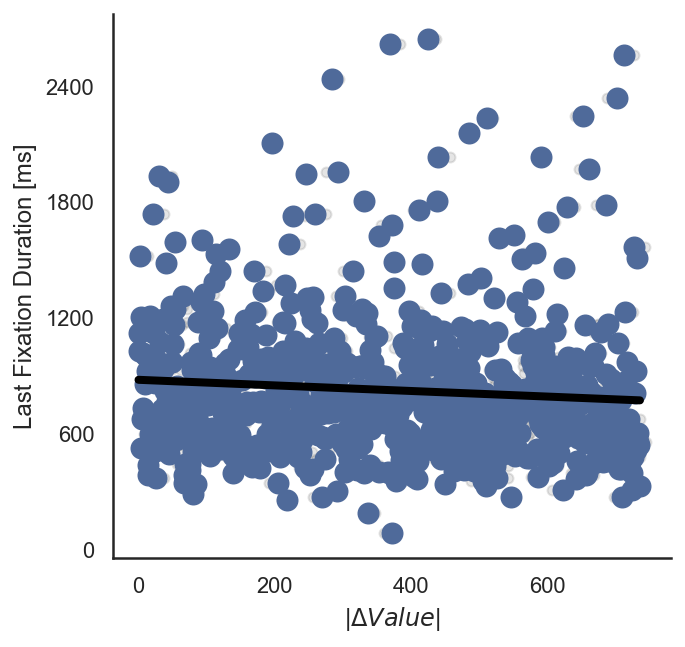

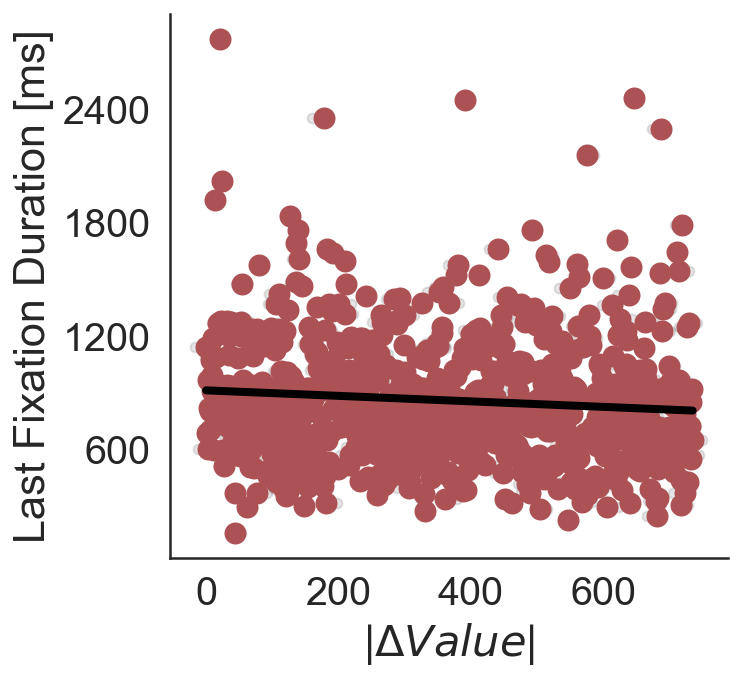

In [61]:
bin_param = 'zAbsDVal'
y_param = 'LastFixationTime'
y_param_label = 'Last Fixation Duration [ms]'
x_param_label = '|$ΔValue$|'

#corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])

# Like
print ('Like')
plot_part_bin(data_exp_1,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
#plt.ylim([0, 2000])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])
# Dislike
print ('Dislike')
plot_part_bin(data_exp_2,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')
#plt.ylim([0, 2000])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])


Like
r = -0.05628981099655561; p = 0.0005930205525634959
Dislike
r = -0.040719253320966854; p = 0.013001212470532772


(600, 1300)

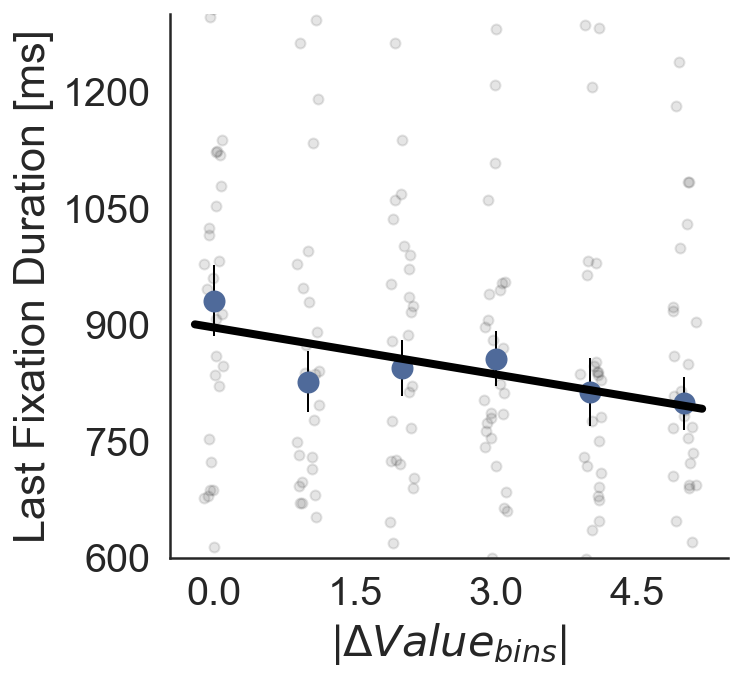

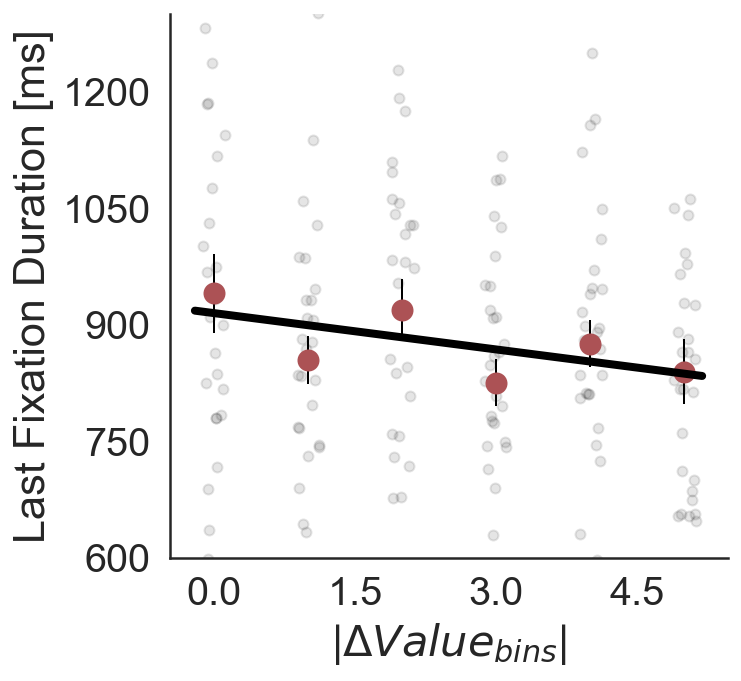

In [62]:

bin_num = 6
DVal_bin = pd.to_numeric(pd.qcut(data_exp_1["zAbsDVal"].values, bin_num , labels=range(bin_num)))
data_exp_1['zAbsDVal_bin'] =  DVal_bin

DVal_bin = pd.to_numeric(pd.qcut(data_exp_2["zAbsDVal"].values, bin_num , labels=range(bin_num)))
data_exp_2['zAbsDVal_bin'] =  DVal_bin

bin_param = 'zAbsDVal_bin'
y_param = 'LastFixationTime'
y_param_label = 'Last Fixation Duration [ms]'
x_param_label = '|$ΔValue_{bins}$|'

#corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])

# Like
print ('Like')
plot_part_bin(data_exp_1,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
plt.ylim([600, 1300])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])
# Dislike
print ('Dislike')
plot_part_bin(data_exp_2,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')
plt.ylim([600, 1300])

Like
r = -0.025499568864090768; p = 0.1199473031195275
Dislike
r = 0.0014990633070596647; p = 0.927174843222141


([<matplotlib.axis.XTick at 0x7fcfb082b940>,
 <a list of 11 Text xticklabel objects>)

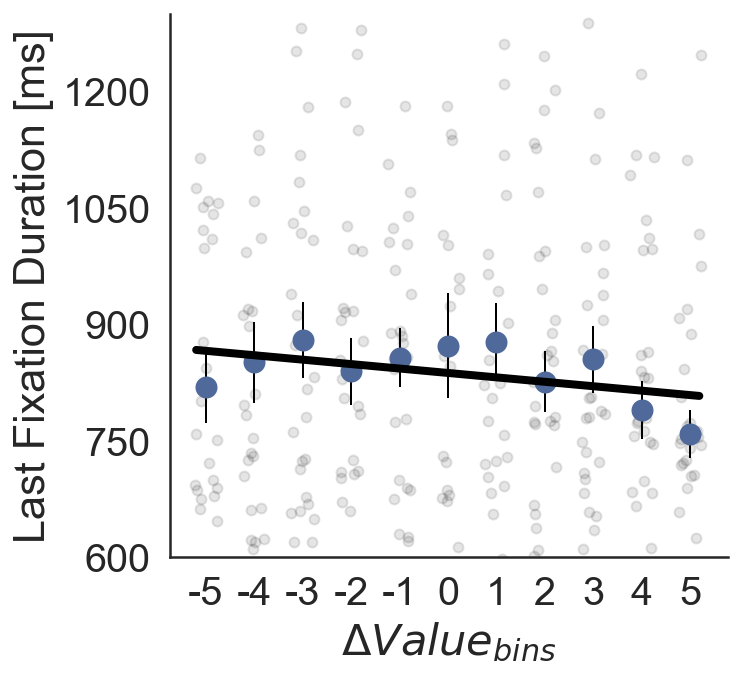

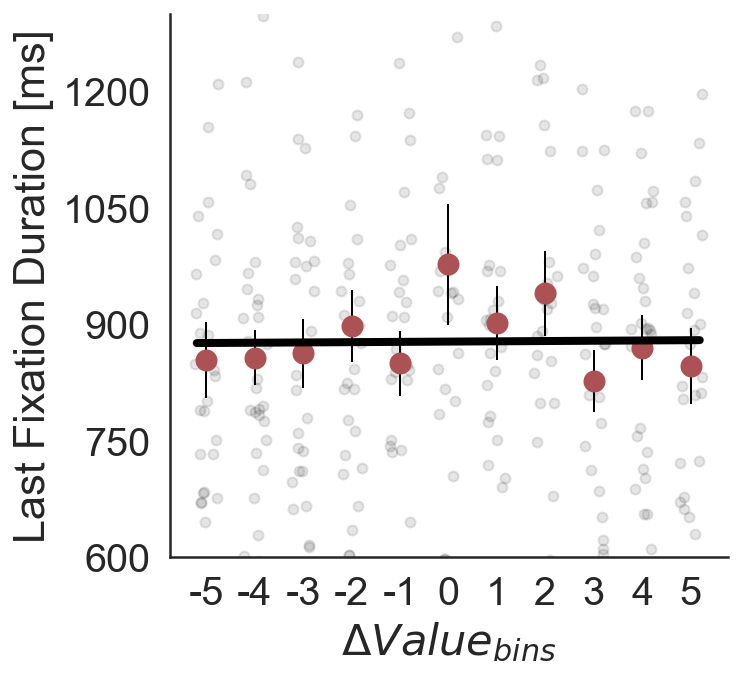

In [82]:

bin_num = 11
DVal_bin = pd.to_numeric(pd.qcut(data_exp_1["zDVal"].values, bin_num , labels=range(bin_num)))
data_exp_1['zDVal_bin'] =  DVal_bin

DVal_bin = pd.to_numeric(pd.qcut(data_exp_2["zDVal"].values, bin_num , labels=range(bin_num)))
data_exp_2['zDVal_bin'] =  DVal_bin

bin_param = 'zDVal_bin'
y_param = 'LastFixationTime'
y_param_label = 'Last Fixation Duration [ms]'
x_param_label = '$ΔValue_{bins}$'

#corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])

# Like
print ('Like')
plot_part_bin(data_exp_1,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
plt.ylim([600, 1300])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [-5,-4,-3,-2,-1,0,1,2,3,4,5])
# Dislike
print ('Dislike')
plot_part_bin(data_exp_2,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')
plt.ylim([600, 1300])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [-5,-4,-3,-2,-1,0,1,2,3,4,5])

## Average number of fixations

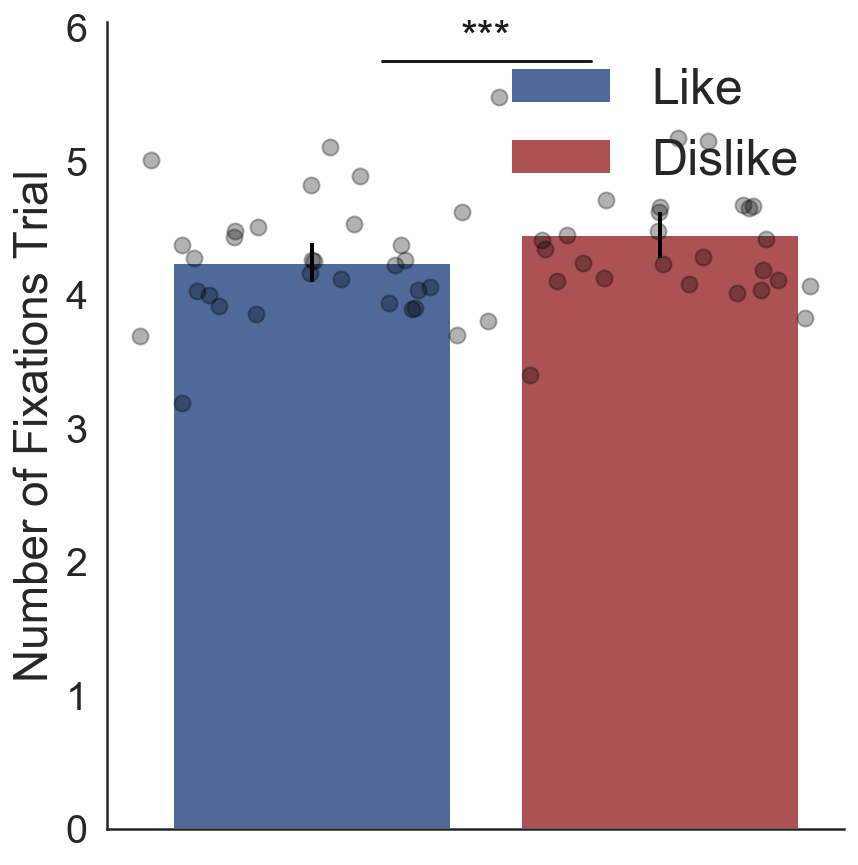

In [63]:
bin_param = 'fixatNum'
#y_param = ''
#data_exp_1.groupby(['Part', bin_param])[y_param].mean()

fixatNum_part_like = data_exp_1.groupby(['Part'])[bin_param].mean().values
fixatNum_part_dislike = data_exp_2.groupby(['Part'])[bin_param].mean().values

# Generate figure

fig = plt.figure(figsize=[8,8])
gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)

ax = fig.add_subplot(gs[0,0])
# bars
ax.bar(1, np.mean(fixatNum_part_like), width=0.8,color= '#4F6A9A')
ax.bar(2, np.mean(fixatNum_part_dislike), width=0.8,color= '#AC5255')

# error
ax.errorbar(1, np.mean(fixatNum_part_like), yerr=scipy.stats.sem(fixatNum_part_like)*1.96, lw=2, color='#000000')
ax.errorbar(2, np.mean(fixatNum_part_dislike), yerr=scipy.stats.sem(fixatNum_part_dislike)*1.96, lw=2, color='#000000')
       

for i in range(1,len(fixatNum_part_dislike)):
        jittr = np.random.uniform(low=-0.5,high=0.5)
        ax.plot(1+jittr, fixatNum_part_like[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax.plot(2+jittr, fixatNum_part_dislike[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

ax.set_xticks([1,2])
ax.set_xticklabels(["",""], rotation=0, fontsize=23)
ax.set_ylabel('Number of Fixations Trial', fontsize=23)
ax.set_xlabel('', fontsize=23)

#ax.set_ylim([0.25,0.65])

# add star

[s1, p1] = stats.ttest_rel(fixatNum_part_like,fixatNum_part_dislike)
add_star2(fixatNum_part_like, fixatNum_part_dislike, p1,1,2)

# add legend

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Like')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Dislike')

leg = plt.legend(handles=[patch1,patch2],fontsize=25, loc = 'upper right')
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

sns.despine()


Like
r = -0.10992076088245824; p = 1.787668707995263e-11
Dislike
r = -0.08911757605521231; p = 5.1965645804576744e-08


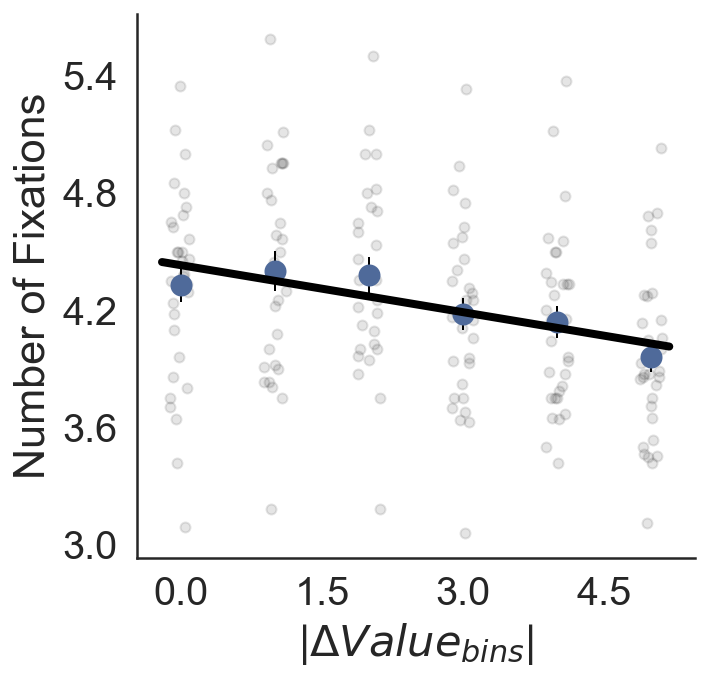

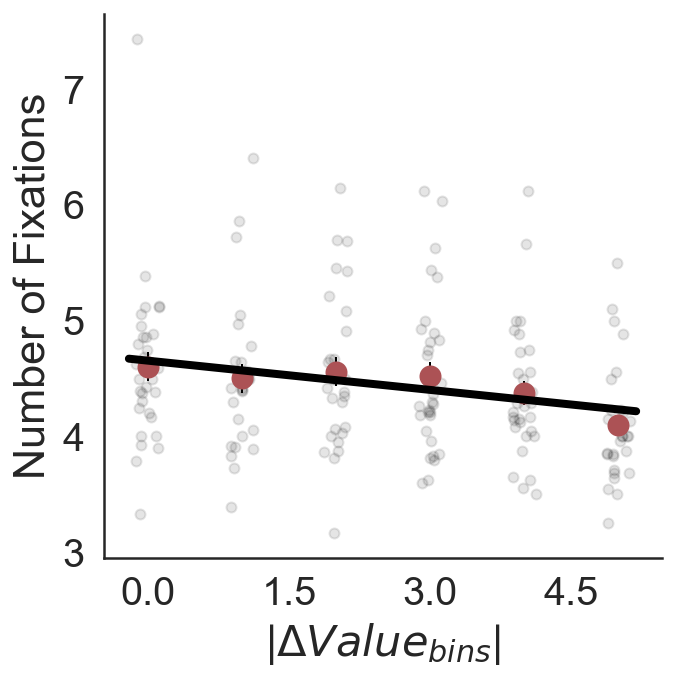

In [64]:

bin_num = 6
DVal_bin = pd.to_numeric(pd.qcut(data_exp_1["zAbsDVal"].values, bin_num , labels=range(bin_num)))
data_exp_1['zAbsDVal_bin'] =  DVal_bin

DVal_bin = pd.to_numeric(pd.qcut(data_exp_2["zAbsDVal"].values, bin_num , labels=range(bin_num)))
data_exp_2['zAbsDVal_bin'] =  DVal_bin

bin_param = 'zAbsDVal_bin'
y_param = 'fixatNum'
y_param_label = 'Number of Fixations'
x_param_label = '|$ΔValue_{bins}$|'

#corr = stats.pearsonr(fix_ins[~nas], dvals[~nas])

# Like
print ('Like')
plot_part_bin(data_exp_1,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#4F6A9A')
#plt.ylim([0, 2000])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10], [0,1,2,3,4,5,6,7,8,9,10])
# Dislike
print ('Dislike')
plot_part_bin(data_exp_2,bin_param, y_param,y_param_label,x_param_label,addstar = 0,colsel ='#AC5255')

In [65]:
fixatNum_part_like

array([4.56666667, 3.19166667, 4.03333333, 4.16666667, 3.91666667,
       3.89166667, 3.94166667, 4.50833333, 4.025     , 4.475     ,
       4.11666667, 4.05833333, 4.825     , 5.10833333, 4.275     ,
       4.        , 4.25      , 3.9       , 3.69166667, 3.7       ,
       4.375     , 4.89166667, 4.225     , 4.25833333, 4.61666667,
       4.375     , 4.43333333, 4.53333333, 4.25833333, 3.85833333,
       5.00833333])

In [66]:
fixatNum_part_dislike

array([4.825     , 3.4       , 4.41666667, 4.475     , 4.45      ,
       4.03333333, 4.01666667, 4.70833333, 4.34166667, 4.24166667,
       4.08333333, 4.10833333, 4.61666667, 5.175     , 4.40833333,
       4.1       , 4.23333333, 4.18333333, 3.8       , 3.825     ,
       4.65      , 5.15      , 4.675     , 4.66666667, 4.06666667,
       5.04166667, 5.64166667, 4.28333333, 4.65833333, 4.125     ,
       5.48333333])

## Non Last 2 Fixation DDT Regression

### Dislike Condition

In [71]:
%%R

if (file.exists('SavedModels/HModel_Choice_Dislike_FirstFixDDT_NonLast2_31_m1.rda')){
    load('SavedModels/HModel_Choice_Dislike_FirstFixDDT_NonLast2_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Dislike_hmodel =  glmer(Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal  + zDDT_nonLast2Fix  + zDVal:zConf | Part), data=data_exp1_DisLike, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))

display (Choice_Dislike_hmodel)
save(Choice_Dislike_hmodel, file = "SavedModels/HModel_Choice_Dislike_FirstFixDDT_NonLast2_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + 
    zDVal:zConf | Part), data = data_exp1_DisLike, family = "binomial", 
    control = glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
                 coef.est coef.se
(Intercept)       0.14     0.13  
zDVal            -1.22     0.16  
zConf             0.05     0.06  
zTotVal           0.00     0.06  
zDDT_nonLast2Fix  1.98     0.22  
zDVal:zConf      -0.39     0.09  

Error terms:
 Groups   Name             Std.Dev. Corr                          
 Part     (Intercept)      0.64                                   
          zDVal            0.71      0.13                         
          zConf            0.17      0.73 -0.17                   
          zTotVal          0.03      0.44  0.94  0.05             
          zDDT_nonLast2Fix 1.12     -0.08  0.23  0.26  0.15       
          zDVal:zConf      0.29     -0.12  0.80  0.0

In [72]:
%%R
Choice_Dislike_hmodel

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf |          Part)
   Data: data_exp1_DisLike
      AIC       BIC    logLik  deviance  df.resid 
 2328.836  2488.402 -1137.418  2274.836      2697 
Random effects:
 Groups Name             Std.Dev. Corr                         
 Part   (Intercept)      0.64098                               
        zDVal            0.71177   0.13                        
        zConf            0.17366   0.73 -0.17                  
        zTotVal          0.03428   0.44  0.94  0.05            
        zDDT_nonLast2Fix 1.12181  -0.08  0.23  0.26  0.15      
        zDVal:zConf      0.29497  -0.12  0.80  0.03  0.65  0.62
Number of obs: 2724, groups:  Part, 31
Fixed Effects:
     (Intercept)             zDVal             zConf           zTotVal  

In [73]:
%%R

# If we want to see individually the value of each coefficient for the participants
#coef(Choice_Dislike_hmodel)

#Extract parameters
fix_Choice_Dislike_hmodel <- fixef(Choice_Dislike_hmodel)
fix_se_Choice_Dislike_hmodel <- sqrt(diag(vcov(Choice_Dislike_hmodel)))
names_Choice_Dislike_hmodel <- names(fix_Choice_Dislike_hmodel)

# Extract mixed effect paramters
mix_Choice_Dislike_model <- coef(Choice_Dislike_hmodel)

summary(Choice_Dislike_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf |          Part)
   Data: data_exp1_DisLike
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  2328.8   2488.4  -1137.4   2274.8     2697 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-56.971  -0.426   0.048   0.457  22.988 

Random effects:
 Groups Name             Variance Std.Dev. Corr                         
 Part   (Intercept)      0.410858 0.64098                               
        zDVal            0.506611 0.71177   0.13                        
        zConf            0.030159 0.17366   0.73 -0.17                  
        zTotVal          0.001175 0.03428   0.44  0.94  0.05            
        zDDT_nonLast2Fix 1.258457 1.

In [74]:
%R -o fix_Choice_Dislike_hmodel -o fix_se_Choice_Dislike_hmodel -o names_Choice_Dislike_hmodel -o mix_Choice_Dislike_model

#Generate table with parameters to plot
Choice_Dislike_hmodel_table = regtable(fix_Choice_Dislike_hmodel, fix_se_Choice_Dislike_hmodel, names_Choice_Dislike_hmodel)
Choice_Dislike_hmodel_table.columns = ['Inter', 'ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]

# Extract table containing mixed effects for the model
mix_Choice_Dislike_model = mix_Choice_Dislike_model[0]

In [75]:
Choice_Dislike_hmodel_table

,Inter,ΔValue,Confidence,ΣValue,ΔDT,ΔValue x Conf
coefficient,0.140861,-1.217476,0.051948,-0.004227,1.982690,-0.385458
se,0.131077,0.155300,0.064310,0.057698,0.223113,0.089479
CImin,-0.116051,-1.521864,-0.074099,-0.117315,1.545389,-0.560837
CImax,0.397772,-0.913088,0.177996,0.108860,2.419990,-0.210078


### Like Condition

In [76]:
%%R
if (file.exists('SavedModels/HModel_Choice_Like_FirstFixDDT_NonLast2_31_m1.rda')){
    load('SavedModels/HModel_Choice_Like_FirstFixDDT_NonLast2_31_m1.rda')   
    print('  Found old parameter estimates in "SavedModels/". Skipping estimation...')
}
else{
# Fit binomial hierarchical model
Choice_Like_hmodel =  glmer(Choice ~  zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf + 
                               (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf  | Part), data=data_exp1_Like, family='binomial',
                    control=glmerControl(optimizer="optimx", optCtrl=list(method="nlminb")))
display (Choice_Like_hmodel)
save(Choice_Like_hmodel, file = "SavedModels/HModel_Choice_Like_FirstFixDDT_NonLast2_31_m1.rda")
}

glmer(formula = Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + 
    zDVal:zConf + (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + 
    zDVal:zConf | Part), data = data_exp1_Like, family = "binomial", 
    control = glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb")))
                 coef.est coef.se
(Intercept)       0.18     0.15  
zDVal             1.21     0.18  
zConf            -0.16     0.08  
zTotVal           0.11     0.07  
zDDT_nonLast2Fix  3.04     0.29  
zDVal:zConf       0.66     0.13  

Error terms:
 Groups   Name             Std.Dev. Corr                          
 Part     (Intercept)      0.75                                   
          zDVal            0.82     -0.04                         
          zConf            0.19      0.51 -0.65                   
          zTotVal          0.12     -0.22 -0.74  0.15             
          zDDT_nonLast2Fix 1.36      0.00 -0.39 -0.11  0.86       
          zDVal:zConf      0.38     -0.62  0.71 -0.97 -

In [77]:
%%R
#Extract regression parameters
fix_Choice_Like_hmodel <- fixef(Choice_Like_hmodel)
# Calculate standard error for paramters
fix_se_Choice_Like_hmodel <- sqrt(diag(vcov(Choice_Like_hmodel)))
names_Choice_Like_hmodel <- names(Choice_Like_hmodel)
summary(Choice_Like_hmodel)

# Extract mixed effect paramters
mix_Choice_Like_model <- coef(Choice_Like_hmodel)

summary(Choice_Like_hmodel)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Choice ~ zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf +  
    (zDVal + zConf + zTotVal + zDDT_nonLast2Fix + zDVal:zConf |          Part)
   Data: data_exp1_Like
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  1818.9   1977.3   -882.5   1764.9     2581 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-54.598  -0.309   0.024   0.329 141.010 

Random effects:
 Groups Name             Variance Std.Dev. Corr                         
 Part   (Intercept)      0.56757  0.7534                                
        zDVal            0.67430  0.8212   -0.04                        
        zConf            0.03533  0.1880    0.51 -0.65                  
        zTotVal          0.01530  0.1237   -0.22 -0.74  0.15            
        zDDT_nonLast2Fix 1.85418  1.361

In [78]:
%R -o fix_Choice_Like_hmodel -o fix_se_Choice_Like_hmodel -o mix_Choice_Like_model
 #-o names_Choice_Like_hmodel 

# we use the same names that were defined for the predictors that in the dislike case, since they are the same in both cases
Choice_Like_hmodel_table = regtable(fix_Choice_Like_hmodel, fix_se_Choice_Like_hmodel, names_Choice_Dislike_hmodel)
Choice_Like_hmodel_table.columns = [ 'Inter','ΔValue', 'Confidence', "ΣValue", "ΔDT", "ΔValue\n x   \nConf"]
mix_Choice_Like_model = mix_Choice_Like_model[0]

#Coefpresplot(Choice_Like_hmodel_table, title='', ticklabsize=16, size='narrow', ymultiple=0.5, n_ET_predictors=2)
#[i.set_color('#03719c') for i in plt.gca().get_xticklabels()[4:]]
#plt.savefig('../../figures/CoM_cut_slow_1.png', dpi=600, bbox_inches='tight')

### Plotting both conditions

Mismatch
---------------- SIGNIFICANT FACTOR ----------------------
Inter : MeanL = 0.18; t =  1.55 ; p-value =0.13
Inter : MeanD = 0.14; t =  1.36 ; p-value =0.18
ΔValue : MeanL = 1.18; t =  9.4792 ; p-value =0.0***
ΔValue : MeanD = -1.17; t =  -10.82571 ; p-value =0.0***
Confidence : MeanL = -0.14; t =  -5.43842 ; p-value =1e-05***
Confidence : MeanD = 0.04; t =  1.8 ; p-value =0.08
ΣValue : MeanL = 0.11; t =  5.48725 ; p-value =1e-05***
ΣValue : MeanD = -0.0; t =  -0.44 ; p-value =0.66
ΔDT : MeanL = 2.91; t =  13.66826 ; p-value =0.0***
ΔDT : MeanD = 1.9; t =  10.35273 ; p-value =0.0***
ΔValue
 x   
Conf : MeanL = 0.63; t =  11.13538 ; p-value =0.0***
ΔValue
 x   
Conf : MeanD = -0.38; t =  -8.59891 ; p-value =0.0***
---------------- COMPARE [ LIKE - DISLIKE ] ----------------------
Inter : MeanL = 0.18; MeanD = 0.14; [Like - Dislike] =  0.0; t =  0.788 ; p-value =0.437
ΔValue : MeanL = 1.18; MeanD = -1.17453; [Like - Dislike] =  2.0; t =  11.47579 ; p-value =0.0***
Confidence : Mea

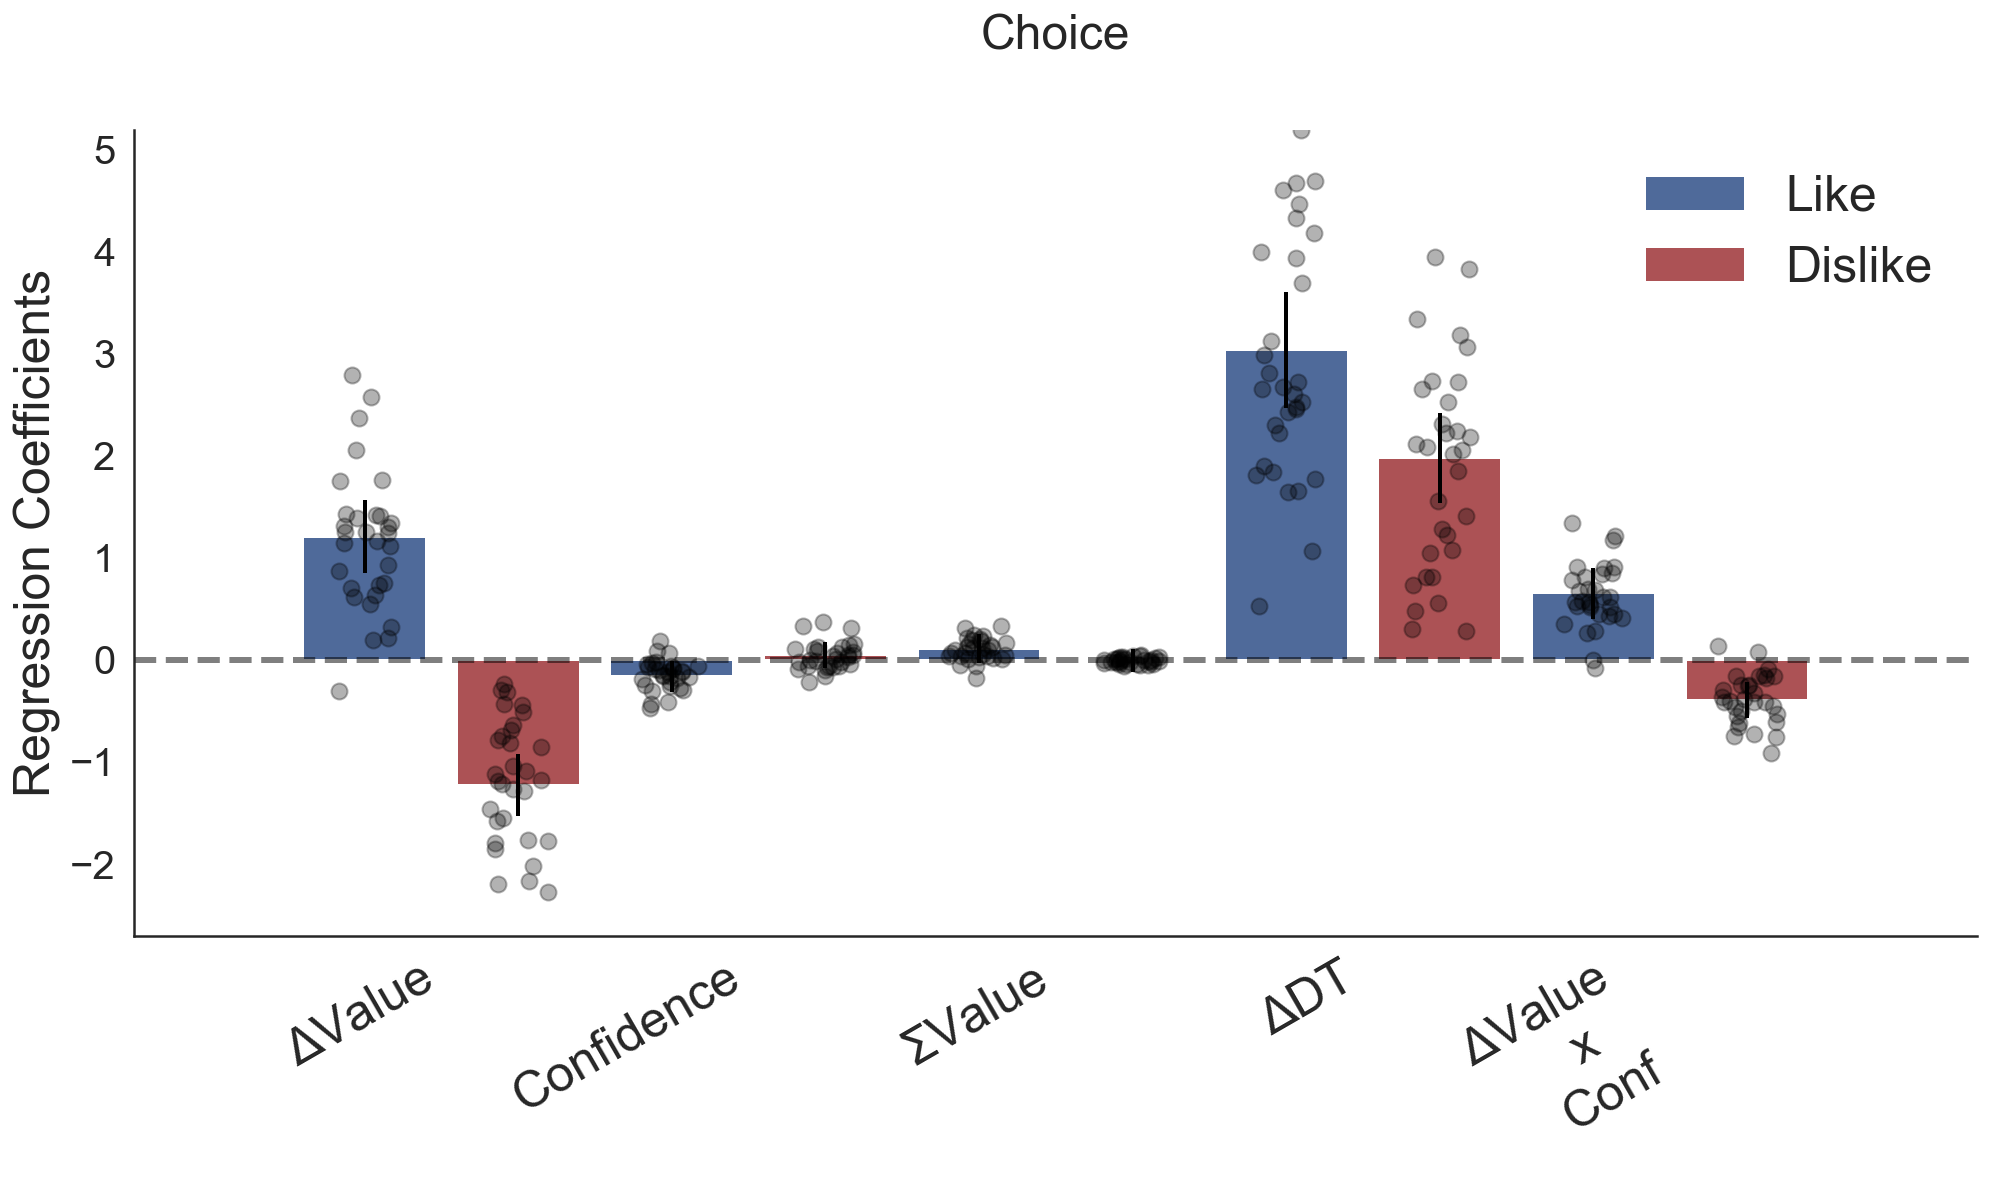

In [79]:
#Coefpresplot2(Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0)

#Coefpresplot_bar(Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol ='#AC5255' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))
#Coefpresplot_bar(Choice_Like_hmodel_table, mix_Choice_Like_model, barcol ='#4F6A9A' ,title='Choice', intercept=True, ticklabsize=16, size='big', n_ET_predictors=0, ylimits = (-3,4))

Choice_Like_hmodel_table

mix_Choice_Like_model

Choice_Dislike_hmodel_table

mix_Choice_Dislike_model

Coefpresplot_bar2(Choice_Like_hmodel_table, mix_Choice_Like_model,Choice_Dislike_hmodel_table, mix_Choice_Dislike_model, barcol1='#4F6A9A',barcol2='#AC5255', title='Choice', size='big',ymultiple=1, ticklabsize=20)
plt.xlim(0, 6)
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.svg', format='svg', dpi = 500 )
#plt.savefig('SavedFigures/FF2018ChoiceRegressionLikeDislike_31.png', dpi = 500 )

ttestprint (Choice_Like_hmodel_table,Choice_Like_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model )

# ---------------------
# attempt but not continued

# Remove "Motor" component from choice

### First pick the easier trials and extract their RT, we'll assume they are 

In [231]:
data_exp_1 =  data_exp11.loc[data_exp11.BlockCond == 1] # like frame
data_exp_2 =  data_exp11.loc[data_exp11.BlockCond == 2] # dislike frame

data_exp_1 = data_exp_1.reset_index(drop=True)
data_exp_2 = data_exp_2.reset_index(drop=True)

In [232]:
# separate per participant

motor_time_part = []
for i in data_exp11.Part.unique():

    data_exp11_part = data_exp11.loc[data_exp11.Part == i]
    bin_num = 3
    dVal_bin = pd.to_numeric(pd.qcut(data_exp11_part["zAbsDVal"].values, bin_num , labels=range(bin_num), duplicates = 'drop'))
    data_exp11_part['zAbsDVal_bin'] =  dVal_bin
    
    data_exp_part_easy = data_exp11_part.loc[data_exp11_part.zAbsDVal_bin == (bin_num - 1)] # pick trials with more difference (easier trials)
    data_exp_part_medium = data_exp11_part.loc[data_exp11_part.zAbsDVal_bin == (bin_num - 2)] 
    data_exp_part_hard = data_exp11_part.loc[data_exp11_part.zAbsDVal_bin == (bin_num - 3)] 

    motor_time_1 = data_exp_part_easy.RT.mean()
    motor_time_2 = data_exp_part_medium.RT.mean()
    motor_time_3 = data_exp_part_hard.RT.mean()

    motor_time_part.append([motor_time_1,motor_time_2,motor_time_3 ])
    

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [233]:
motor_time_part1 = pd.DataFrame(motor_time_part,columns=['easy','med','hard'])

print(motor_time_part1.easy.mean())
print(motor_time_part1.med.mean())
print(motor_time_part1.hard.mean())

2721.678703652795
3021.306123754487
3226.4501011975412


In [230]:
dVal_bin = pd.to_numeric(pd.qcut(data_exp_2["zAbsDVal"].values, bin_num , labels=range(bin_num)))
data_exp_2['zAbsDVal_bin'] =  dVal_bin

data_exp_1_easy = data_exp_1.loc[data_exp_1.zAbsDVal_bin == 7] # pick trials with more difference (easier trials)
data_exp_2_easy = data_exp_2.loc[data_exp_2.zAbsDVal_bin == 7] # pick trials with more difference (easier trials)

data_exp_1_hard = data_exp_1.loc[data_exp_1.zAbsDVal_bin == 0] # pick trials with more difference (easier trials)
data_exp_2_hard = data_exp_2.loc[data_exp_2.zAbsDVal_bin == 0] # pick trials with more difference (easier trials)


for i in 
    motor_time_1 = data_exp_1_easy.RT.mean()
    motor_time_2 = data_exp_2_easy.RT.mean()

SyntaxError: invalid syntax (<ipython-input-230-92da3ada06c3>, line 12)

## --[END]--

------------------------------------

<a id='ImpPkg'></a>
# 1. Import Packages

In [41]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
from sklearn.utils import shuffle
import statsmodels

import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab
import statsmodels.formula.api as sm
from statsmodels.formula.api import logit
# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [42]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [43]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [44]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1),duplicates= 'drop')

    return qvalues

### Full simple logistic graph

In [45]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [46]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [47]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [48]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [49]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [50]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [51]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [52]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [53]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4)       

    fig.text(0.5, 0.0, xlab, ha='center')
    fig.text(0.0, 0.5, ylab, va='center', rotation='vertical')
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [54]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [55]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    
    plt.show()


In [56]:
def ttestsPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [57]:
def ttestsBarPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))
    
    plt.bar( [1] ,  [mean(data1)] , color = c1, zorder = 0)
    plt.bar( [2] ,  [mean(data2)] , color = c2, zorder = 0)
    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
                    
    plt.scatter([1]*len(data1)+jittr, data1, c= '#000000', alpha=0.5,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= '#000000', alpha=0.5,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [58]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()

In [59]:
def logisticplot_like_dislike_bins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()



    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1,label=modlow)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2,label=modhigh)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
  #  sub.set_xticks((-5,-3,-1,1,3,5))
  #  sub.set_yticks((0,0.25,0.5,0.75,1))
  #  sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=8, prop={'size':20})
    sns.despine()

In [60]:
def logisticplot_like_dislike_onlyOne (data1,modlow, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    

    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
        
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False,)
    sns.despine()

In [61]:
def logisticplot_like_dislike_plotAndbins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False)
    sns.despine()

In [62]:
def logisticplot_like_dislike_plotAndbins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False)
    sns.despine()

In [63]:
# calculate standard error
def SE_calc (a):
    b = np.std(a)/np.sqrt(len(a))
    return b

In [64]:
# Add asterisk to plots
def add_star(RT_like, RT_dislike,loc1,loc2,stat_tit):
    
    [s, p] = stats.ttest_rel(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p)+ '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1, loc2   
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

# Add asterisk independent t-test
def add_star_ind(RT_like, RT_dislike,loc1,loc2,stat_tit,colour = 'k', low = 0):
    
    [s, p] = stats.ttest_ind(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p) + '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1,loc2  
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)]) - low
        y, h, col = y_max + y_max/50, y_max/50, colour
        
        plt.plot( [x1, x2], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [65]:
# Add asterisk
def add_star2(RT_like, RT_dislike, p,x1,x2):
    
    if p>0.05:
        print(' no significant results')
    else:    
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
    
        y_max = max([np.max(RT_like), np.max(RT_dislike)])
        y, h, col = y_max , y_max/50, 'k'
        plt.plot( [x1+0.8, x2-0.8], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [66]:
def plot_part_bin(data_exp11,bin_param, y_param,y_param_label,x_param_label,plot_line = [], addstar = 0, colsel = 'blue'):

    # figure
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set(style='white', font_scale=1.8)
    
    subject_means = data_exp11.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    
   # print (subject_means)
   # print(means)
   # print(sems)
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color='black',alpha=0.3,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel, markersize = 10, fillstyle = 'full',
             color=colsel, linewidth=1)
    
    # plot a line 
    if not not plot_line:
        plt.plot([0,np.max(x)],[plot_line,plot_line],'--')
    
    #ax.set_ylim(0, 5000)
    ax.set_xlabel(x_param_label)
    ax.set_ylabel(y_param_label)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

    if addstar == 1:
        add_star(scatter_data.loc[scatter_data[bin_param] == np.min(x)][y_param].values, \
                scatter_data.loc[scatter_data[bin_param] == np.max(x)][y_param].values,np.min(x),np.max(x),'lowBin - highBin')

    
    
    sns.despine()
    
        

In [67]:
def plot_part_bin2(data_exp11,data_exp22,bin_param, y_param,y_param_label,x_param_label,plot_line = [], addstar = 0, colsel = 'blue',colsel2 = 'red',crossstar = 0,crslow = 0):

    # figure
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set(style='white', font_scale=1.8)
    # generate plots for the first dataframe
    subject_means = data_exp11.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    scatter_data1 = scatter_data
    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color=colsel,alpha=0.2,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel, markersize = 10, fillstyle = 'full',
             color=colsel, linewidth=1)
    
    #generate plots for the second dataframe
    
    subject_means = data_exp22.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    scatter_data2 = scatter_data

    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color=colsel2,alpha=0.2,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel2, markersize = 10, fillstyle = 'full',
             color=colsel2, linewidth=1)
    
    
    # plot a line 
    if not not plot_line:
        plt.plot([0,np.max(x)],[plot_line,plot_line],'--')
    
    #ax.set_ylim(0, 5000)
    ax.set_xlabel(x_param_label)
    ax.set_ylabel(y_param_label)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

    if addstar == 1:

    
    # Add labels for scatter plot of mean rt per participant
        for ii in scatter_data[bin_param].unique(): 
                print ('mean1:' + str(np.mean(scatter_data1.loc[(scatter_data1[bin_param] == ii)][y_param].values)) + '  ;  mean 2:' + str(np.mean(scatter_data2.loc[(scatter_data1[bin_param] == ii)][y_param].values)))
                add_star_ind(scatter_data1.loc[(scatter_data1[bin_param] == ii)][y_param].values, \
                scatter_data2.loc[(scatter_data2[bin_param] == ii)][y_param].values,ii,ii,str('bin'+ str(ii)))
    
    if crossstar == 1: # only to calculate difference if we have two bins (within condition comparison)
                # comparison condition 1
                add_star_ind(scatter_data1.loc[(scatter_data1[bin_param] == 0)][y_param].values, \
                scatter_data1.loc[(scatter_data1[bin_param] == 1)][y_param].values,0+.25,1-.25,'cross like',colour = 'blue',low = crslow)
                # comparison condition 2
                add_star_ind(scatter_data2.loc[(scatter_data2[bin_param] == 0)][y_param].values, \
                scatter_data2.loc[(scatter_data2[bin_param] == 1)][y_param].values,0+.25,1-.25,'cross dislike',colour = 'red', low = 2*crslow)
    
    patch1 = mpatches.Patch(facecolor=colsel,hatch=r'', label='Like')
    patch2 = mpatches.Patch(facecolor=colsel2,hatch=r'', label='Dislike')
    leg = plt.legend(handles=[patch1,patch2],fontsize=15,loc = "upper left",frameon = False)

    sns.despine()
    
        

In [68]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0, hatch2 ='',labels = ['',''] ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    bar_sep= 0.25
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=24)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-bar_sep, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-bar_sep, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+bar_sep, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+bar_sep, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-bar_sep+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+bar_sep+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=25)
    ax.xaxis.set_tick_params(labelsize=25)

    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    

    patch1 = mpatches.Patch(facecolor=colourlist1[position-1],hatch=r'', label='Like')
    patch2 = mpatches.Patch(facecolor=colourlist2[position-1],hatch=r'', label='Dislike')

    leg = plt.legend(handles=[patch1,patch2],fontsize=25)
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_linewidth(0.0)
    
    
    sns.despine()

In [69]:
def ttestprint (Choice_Like_hmodel_table,Choice_Dislike_hmodel_table, mix_Choice_Like_model,mix_Choice_Dislike_model):
    a = 1
    if len(Choice_Like_hmodel_table.columns) >= len(mix_Choice_Like_model):
        print ("Mismatch")
        a = 0
    
    print ("---------------- SIGNIFICANT FACTOR ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i + a]
        part_coefs_like = mix_Choice_Like_model[i ]
    
        [s, p] = stats.ttest_1samp(part_coefs_like,0)
        if p<0.001:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***")
        elif p<0.01:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2))+ "**")
        elif p<0.05:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2))+ "*")
        else:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)))
    
      
        part_coefs_dislike = mix_Choice_Dislike_model[i + a]
    
        [s, p] = stats.ttest_1samp(part_coefs_dislike,0)
        if p<0.001:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5)) + "***")        
        elif p<0.01:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) + "**")
        elif p<0.05:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) + "*")
        else:
            print (param_name + " : MeanD = "+ str(round(mean(part_coefs_dislike),2))+ "; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)))
        
        
    print ("---------------- COMPARE [ LIKE - DISLIKE ] ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i]
        part_coefs_like = mix_Choice_Like_model[ i + a]
        part_coefs_dislike = mix_Choice_Dislike_model[ i + a ]
                
        diff = mean(part_coefs_like) - mean(part_coefs_dislike)
        [s, p] = stats.ttest_rel(part_coefs_like,part_coefs_dislike)
        if p<0.001:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),5))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***" )        
        elif p<0.01:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "**" )
        elif p<0.05:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "*" )
        else:
            print (param_name + " : MeanL = "+ str(round(mean(part_coefs_like),2))+ "; MeanD = "+ str(round(mean(part_coefs_dislike),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3)) )
            
    print ("---------------- MAGNITUDE [ LIKE - DISLIKE ] ----------------------")
    
    for i in range(len(Choice_Like_hmodel_table.columns)):
        param_name = Choice_Like_hmodel_table.columns[i]
        part_coefs_like = mix_Choice_Like_model[ i + a]
        part_coefs_dislike = mix_Choice_Dislike_model[ i + a ]
                
        diff = mean(np.absolute(part_coefs_like)) - mean(np.absolute(part_coefs_dislike))
        [s, p] = stats.ttest_rel(np.absolute(part_coefs_like),np.absolute(part_coefs_dislike))
        if p<0.001:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,5)) + " ; p-value =" + str(round(p,5))+ "***" )        
        if p<0.01:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "**" )
        elif p<0.05:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3))+ "*" )
        else:
            print (param_name + " : |MeanL| = "+ str(round(mean(np.absolute(part_coefs_like)),2))+ "; |MeanD| = "+ str(round(mean(np.absolute(part_coefs_dislike)),2))+"; [Like - Dislike] =  " + str(round(diff)) +"; t =  " + str(round(s,3)) + " ; p-value =" + str(round(p,3)) )
        
    

In [70]:
# Add asterisk to plots
def add_star(RT_like, RT_dislike,loc1,loc2,stat_tit):
    
    [s, p] = stats.ttest_rel(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p)+ '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1, loc2   
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

# Add asterisk independent t-test
def add_star_ind(RT_like, RT_dislike,loc1,loc2,stat_tit,colour = 'k', low = 0):
    
    [s, p] = stats.ttest_ind(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p) + '; compared fix:  ' + stat_tit )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = loc1,loc2  
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)]) - low
        y, h, col = y_max + y_max/50, y_max/50, colour
        
        plt.plot( [x1, x2], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)
        
        
        
    

In [71]:
def plot_part_bin(data_exp11,bin_param, y_param,y_param_label,x_param_label,plot_line = [], addstar = 0, colsel = 'blue'):

    # figure
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.set(style='white', font_scale=1.8)
    
    subject_means = data_exp11.groupby(['Part', bin_param])[y_param].mean()
    means = subject_means.groupby(bin_param).mean()
    sems = subject_means.groupby(bin_param).sem()
    
   # print (subject_means)
   # print(means)
   # print(sems)
    x = np.arange(len(means))
    
    # Add labels for scatter plot of mean rt per participant
    scatter_data = subject_means.reset_index()
    x_scatter = []
    group_labels = np.sort(scatter_data[bin_param].unique())
    for ii in range(len(scatter_data[bin_param].values)):
        a = scatter_data[bin_param].values[ii]
        position_item =  x[np.where(group_labels==a)[0][0]]
        x_scatter.append(position_item) 
   
    ax.vlines(x, means - sems, means + sems,
          linewidth=1, color= 'black')
    jittr = np.random.uniform(low=-max(x)/20,high=max(x)/20,size=len(scatter_data))/2
    ax.plot(x_scatter+jittr, scatter_data[y_param].values, marker='o', ms=5, color='black',alpha=0.1,linestyle="None")
    ax.plot(x, means, 'o',markerfacecolor=colsel, markersize = 10, fillstyle = 'full',
             color=colsel, linewidth=1)
    
    # plot a line 
    if not not plot_line:
        plt.plot([0,np.max(x)],[plot_line,plot_line],'--')
    
    #ax.set_ylim(0, 5000)
    ax.set_xlabel(x_param_label)
    ax.set_ylabel(y_param_label)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

    if addstar == 1:
        add_star(scatter_data.loc[scatter_data[bin_param] == np.min(x)][y_param].values, \
                scatter_data.loc[scatter_data[bin_param] == np.max(x)][y_param].values,np.min(x),np.max(x),'lowBin - highBin')
        
    # plot regression    
    x=x_scatter # x
    y=scatter_data[y_param].values
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='black', lw=4)    
    
    # calculate Pearson's correlation
    corr = stats.pearsonr(data_exp11[y_param].values , data_exp11[bin_param].values)
    print ('r = ' + str(corr[0]) +'; p = ' + str(corr[1]))
    
    sns.despine()